# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [118]:
from pandas.core.dtypes.missing import nan_checker
# 구글 Colab 업그레이드
!pip install --upgrade plotly

### Import Statements

In [119]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [120]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [121]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [122]:
# What is the shape of df_data? (행과 열의 수 확인)
shape = df_data.shape
print(f"The shape of the dataframe is: {shape}")

The shape of the dataframe is: (962, 16)


In [123]:
# What are the column names? ( 컬럼 이름 확인)
columns = df_data.columns
count = 0
for column in columns:
    print(f"Column Index:{count}: Name:{column}")
    count = count + 1

Column Index:0: Name:year
Column Index:1: Name:category
Column Index:2: Name:prize
Column Index:3: Name:motivation
Column Index:4: Name:prize_share
Column Index:5: Name:laureate_type
Column Index:6: Name:full_name
Column Index:7: Name:birth_date
Column Index:8: Name:birth_city
Column Index:9: Name:birth_country
Column Index:10: Name:birth_country_current
Column Index:11: Name:sex
Column Index:12: Name:organization_name
Column Index:13: Name:organization_city
Column Index:14: Name:organization_country
Column Index:15: Name:ISO


In [124]:
# In which year was the Nobel prize first awarded? ( 몇년도에 첫번째 노벨 상이 수여되었나?)
first_year = df_data['year'].min()
print(f"First Year: {first_year}")

First Year: 1901


In [125]:
# Which year is the latest year included in the dataset? ( 데이터셋에 몇년도에 마지막 노벨상이 수여되었나?)
last_year = df_data['year'].max()
print(f"Last Year: {last_year}")

Last Year: 2020


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [126]:
# 데이터셋에 중복된 값이 존재합니까?
boolean_duplicated = df_data.duplicated().values.any()
print(f"Duplicated values: {boolean_duplicated}")

Duplicated values: False


In [127]:
# NaN 값은 있습니까?
nan_checker = df_data.isnull().values.any()
print(f"Nan values: {nan_checker}")

Nan values: True


### Check for NaN Values

In [128]:
# NaN 값이 있는 열 확인
nan_columns = df_data.columns[df_data.isnull().any()]
print(f"Columns with NaN values: {list(nan_columns)}")

Columns with NaN values: ['motivation', 'birth_date', 'birth_city', 'birth_country', 'birth_country_current', 'sex', 'organization_name', 'organization_city', 'organization_country', 'ISO']


In [129]:
# 열마다 몇 개의 NaN 값이 있습니까?
nan_column_count = df_data.isna().sum()
print(f"Nan row count:\n{nan_column_count}")

Nan row count:
year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


# 왜 이렇게 NaN값이 많을까?

### NaN 값이 포함된 행 필터링

In [130]:
nan_rows = df_data[df_data.isnull().any(axis=1)]

# NaN이 있는 행의 데이터를 출력
print(nan_rows)

     year    category                                           prize  \
1    1901  Literature              The Nobel Prize in Literature 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
7    1902  Literature              The Nobel Prize in Literature 1902   
9    1902       Peace                      The Nobel Peace Prize 1902   
..    ...         ...                                             ...   
942  2019  Literature              The Nobel Prize in Literature 2019   
946  2019       Peace                      The Nobel Peace Prize 2019   
954  2020  Literature              The Nobel Prize in Literature 2020   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   

                                            motivation prize_share  \
1    "in special recognition of his poetic composit..

## NaN 값이 특정 열에 있는 경우를 출력

In [131]:
nan_birth_date_rows = df_data[df_data['birth_date'].isnull()]
print(nan_birth_date_rows)

     year category                       prize  \
24   1904    Peace  The Nobel Peace Prize 1904   
60   1910    Peace  The Nobel Peace Prize 1910   
89   1917    Peace  The Nobel Peace Prize 1917   
200  1938    Peace  The Nobel Peace Prize 1938   
215  1944    Peace  The Nobel Peace Prize 1944   
237  1947    Peace  The Nobel Peace Prize 1947   
238  1947    Peace  The Nobel Peace Prize 1947   
283  1954    Peace  The Nobel Peace Prize 1954   
348  1963    Peace  The Nobel Peace Prize 1963   
349  1963    Peace  The Nobel Peace Prize 1963   
366  1965    Peace  The Nobel Peace Prize 1965   
399  1969    Peace  The Nobel Peace Prize 1969   
479  1977    Peace  The Nobel Peace Prize 1977   
523  1981    Peace  The Nobel Peace Prize 1981   
558  1985    Peace  The Nobel Peace Prize 1985   
588  1988    Peace  The Nobel Peace Prize 1988   
659  1995    Peace  The Nobel Peace Prize 1995   
682  1997    Peace  The Nobel Peace Prize 1997   
703  1999    Peace  The Nobel Peace Prize 1999   


## NaN 값의 개수와 비율

In [132]:
# 각 열의 NaN 값 개수와 비율 계산
nan_summary = df_data.isnull().sum().to_frame(name='NaN Count')
nan_summary['NaN Percentage'] = (nan_summary['NaN Count'] / len(df_data)) * 100
print(nan_summary[nan_summary['NaN Count'] > 0])

                       NaN Count  NaN Percentage
motivation                    88            9.15
birth_date                    28            2.91
birth_city                    31            3.22
birth_country                 28            2.91
birth_country_current         28            2.91
sex                           28            2.91
organization_name            255           26.51
organization_city            255           26.51
organization_country         254           26.40
ISO                           28            2.91


## 특정 열에 NaN 값이 많은 경우 원인 분석


In [133]:
# 'organization_name'이 NaN인 행의 다른 열 값 확인
nan_org_rows = df_data[df_data['organization_name'].isnull()]
print(nan_org_rows[['year', 'category', 'full_name']])

     year    category                           full_name
1    1901  Literature                     Sully Prudhomme
3    1901       Peace                      Frédéric Passy
4    1901       Peace                   Jean Henry Dunant
7    1902  Literature  Christian Matthias Theodor Mommsen
9    1902       Peace                Charles Albert Gobat
..    ...         ...                                 ...
932  2018       Peace                         Nadia Murad
942  2019  Literature                        Peter Handke
946  2019       Peace                      Abiy Ahmed Ali
954  2020  Literature                        Louise Glück
958  2020       Peace          World Food Programme (WFP)

[255 rows x 3 columns]


# NaN 값이 많은 이유
## 1. 생년월일(birth_date) NaN의 원인:
- 단체(Organization) 수상자에게는 생년월일 정보가 적용되지 않습니다.
- 예: UN, UNICEF, 적십자 등.
## 2. 조직 이름(organization_name) NaN의 원인:
- 대학이나 연구소에 소속되지 않은 개인 수상자(Individual)에게는 조직 정보가 없을 수 있습니다.
- 문학상(Literature)이나 평화상(Peace) 부문의 수상자 중 독립적인 활동을 한 경우가 여기에 해당됩니다.

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [134]:
df_data.birth_date = pd.to_datetime(df_data['birth_date'])

# 변환된 데이터 확인
print(df_data[['full_name', 'birth_date']].head())

                      full_name birth_date
0  Jacobus Henricus van 't Hoff 1852-08-30
1               Sully Prudhomme 1839-03-16
2        Emil Adolf von Behring 1854-03-15
3                Frédéric Passy 1822-05-20
4             Jean Henry Dunant 1828-05-08


#### Add a Column with the Prize Share as a Percentage

In [135]:
# 데이터 체크
prize_share = df_data['prize_share']
print(prize_share)

# prize_share 열을 '/'로 분리
separated_values = df_data['prize_share'].str.split('/', expand=True)
print(separated_values)

# 분자와 분모를 숫자로 변환
numerator = pd.to_numeric(separated_values[0])
denominator = pd.to_numeric(separated_values[1])

# share_pct 열 추가 (공동 수상자 비율 계산)
df_data['share_pct'] = (numerator / denominator) * 100

# 결과 확인
print(df_data[['prize_share', 'share_pct']].head())

0      1/1
1      1/1
2      1/1
3      1/2
4      1/2
      ... 
957    1/3
958    1/1
959    1/4
960    1/4
961    1/2
Name: prize_share, Length: 962, dtype: object
     0  1
0    1  1
1    1  1
2    1  1
3    1  2
4    1  2
..  .. ..
957  1  3
958  1  1
959  1  4
960  1  4
961  1  2

[962 rows x 2 columns]
  prize_share  share_pct
0         1/1     100.00
1         1/1     100.00
2         1/1     100.00
3         1/2      50.00
4         1/2      50.00


In [136]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [137]:
# 성별 집계
gender_counts = df_data['sex'].value_counts()
print(gender_counts)

sex
Male      876
Female     58
Name: count, dtype: int64


In [138]:
## 도넛 차트 만들기
fig = px.pie(gender_counts, values=gender_counts.values, names=gender_counts.index,
             title="성별별 노벨상 비율", hole=0.4)

fig.show()

In [139]:
## 여성 수상비율
female_percentage = (gender_counts['Female'] / gender_counts.sum()) * 100
print(f"여성 수상 비율: {female_percentage:.2f}%")

여성 수상 비율: 6.21%


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [140]:
## 첫번째 여성수상자 3명 찾기
female_laureates = df_data[df_data['sex'] == 'Female'].sort_values('year').head(3)
print(f" 최초 3명 여성수사자들: \n{female_laureates}")

 최초 3명 여성수사자들: 
    year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic

In [141]:
## 어떤 것을 통해 상을 받았나 ?
print(female_laureates['category'])


18       Physics
29         Peace
51    Literature
Name: category, dtype: object


In [142]:
## 어느기관이었나? birth_country를 통해 파악
print(female_laureates['birth_country'])

18             Russian Empire (Poland)
29    Austrian Empire (Czech Republic)
51                              Sweden
Name: birth_country, dtype: object


# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [143]:
## 다회 수상자는 누구인가 ?
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f' 총 {multiple_winners.full_name.nunique()} 명')

 총 6 명


In [144]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

year   category laureate_type  \
18   1903    Physics    Individual   
62   1911  Chemistry    Individual   
89   1917      Peace  Organization   
215  1944      Peace  Organization   
278  1954  Chemistry    Individual   
283  1954      Peace  Organization   
297  1956    Physics    Individual   
306  1958  Chemistry    Individual   
340  1962      Peace    Individual   
348  1963      Peace  Organization   
424  1972    Physics    Individual   
505  1980  Chemistry    Individual   
523  1981      Peace  Organization   

                                             full_name  
18                         Marie Curie, née Sklodowska  
62                         Marie Curie, née Sklodowska  
89   Comité international de la Croix Rouge (Intern...  
215  Comité international de la Croix Rouge (Intern...  
278                                 Linus Carl Pauling  
283  Office of the United Nations High Commissioner...  
297                                       John Bardeen  
306                                   Frederick Sanger  
340                                 Linus Carl Pauling  
348  Comité international de la Croix Rouge (Intern...  
424                                       John Bardeen  
505                                   Frederick Sanger  
523  Office of the United Nations High Commissioner...

In [145]:
## 다회 수상자는 누구인가 ?
multiple_winners2 = df_data['full_name'].value_counts()
print(f"받은 수\n{multiple_winners2.value_counts()}")
double_winners = multiple_winners2[multiple_winners2 > 1]
print(double_winners.value_counts())

받은 수
count
1    949
2      5
3      1
Name: count, dtype: int64
count
2    5
3    1
Name: count, dtype: int64


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded?

In [146]:
# 고유 범주 갯수
df_data.category.nunique()

6

In [147]:
# 부문별 수상 횟수
category_counts = df_data['category'].value_counts()
print(category_counts)

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64


In [148]:
## 막대차트 첫번째
fig = px.bar(category_counts, x=category_counts.index, y=category_counts.values,
             title="부문별 노벨상 수여 현황", color=category_counts.values,
             color_continuous_scale="Aggrnyl", labels={'y': '수상 횟수'})
fig.update_layout(coloraxis_showscale=False)  # 색상 축 제거
fig.show()

In [149]:
## 막대차트 2번째
prizes_per_category = df_data.category.value_counts()
v_bar = px.bar(
        x = prizes_per_category.index,
        y = prizes_per_category.values,
        color = prizes_per_category.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Prizes Awarded per Category')

v_bar.update_layout(xaxis_title='Nobel Prize Category',
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')
v_bar.show()

In [150]:
most_awarded = category_counts.idxmax()
least_awarded = category_counts.idxmin()
print(f"가장 많이 수여된 부문: {most_awarded}")
print(f"가장 적게 수여된 부문: {least_awarded}")

가장 많이 수여된 부문: Medicine
가장 적게 수여된 부문: Economics


**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [151]:
## 경제학상 수상자 최근 3년 1969년도에 시작
df_data[df_data.category == 'Economics'].sort_values('year')[:3]

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
394  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   
402  1970  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   
394  "for having developed and applied dynamic mode...         1/2   
402  "for the scientific work through which he has ...         1/1   

    laureate_type          full_name birth_date birth_city  \
393    Individual      Jan Tinbergen 1903-04-12  the Hague   
394    Individual      Ragnar Frisch 1895-03-03       Oslo   
402    Individual  Paul A. Samuelson 1915-05-15   Gary, IN   

                birth_country     birth_country_current   sex  \
393               Netherlands               Netherlands  Male   
394                    Norway                    Norway  Male   
402  United States of America  United States of America  Male   

                               organization_name organization_city  \
393          The Netherlands School of Economics         Rotterdam   
394                           University of Oslo              Oslo   
402  Massachusetts Institute of Technology (MIT)     Cambridge, MA   

         organization_country  ISO  share_pct  
393               Netherlands  NLD      50.00  
394                    Norway  NOR      50.00  
402  United States of America  USA     100.00

In [152]:
## 수상자 이름은 누구인가?
df_data[df_data.category == 'Economics'].sort_values('year')[:1]['full_name']

393    Jan Tinbergen
Name: full_name, dtype: object

In [153]:
# 최초 수상자는 누구인가
economics_award = df_data[df_data['category'] == 'Economics']
first_economics_award = economics_award.sort_values('year').iloc[0]
print(first_economics_award[['year', 'full_name']])

year                  1969
full_name    Jan Tinbergen
Name: 393, dtype: object


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [154]:
## 성별과 부문별 집계
## unstack() : 그룹화 결과를 표 형태로 변환합니다.
gender_category_counts = df_data.groupby(['category', 'sex']).size().unstack()
print(gender_category_counts)

sex         Female  Male
category                
Chemistry        7   179
Economics        2    84
Literature      16   101
Medicine        12   210
Peace           17    90
Physics          4   212


In [155]:
## 부문별 성별 차이
### 막대차트
### barmode='group' 막대가 그룹화된 형태로 나타나진다.
fig = px.bar(gender_category_counts, barmode='group',
             title="부문별 성별 수상자 분포", labels={'value': '수상자 수'})
fig.show()

In [156]:
## 문학상 물리학상 여자수
literature_female = gender_category_counts.loc['Literature', 'Female']
physics_female = gender_category_counts.loc['Physics', 'Female']
print(f"문학상 여성 수상자: {literature_female}, 물리학상 여성 수상자: {physics_female}")

문학상 여성 수상자: 16, 물리학상 여성 수상자: 4


### Pandas GroupBy와 agg() 사용법 간단 정리

##### as_index=False
- 그룹화한 열을 인덱스로 사용하지 않고, 일반 열로 유지합니다.
- 데이터 접근이 간단해지고, 추가 작업이 필요하지 않습니다.

##### .agg({'prize': pd.Series.count})
- 그룹화된 데이터에 대해 집계 함수를 적용해야 할 때.
- 데이터 분석에서, 그룹별로 개수, 평균, 합계 등을 구할 때 자주 사용됩니다.

In [157]:
cat_men_women = df_data.groupby(['category', 'sex'],
                               as_index=False).agg({'prize': pd.Series.count})

## prize 내림차순
## inplace=True -> 데이터프레임 직접 수정 합니다. 반환값이 없이 기존 데이터프레임을 변경합니다.
cat_men_women.sort_values('prize', ascending=False, inplace=True)
print(f"{cat_men_women}")

      category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2


In [158]:
# Plotly Express를 사용하여 막대 차트 생성
v_bar_split = px.bar(
    x=cat_men_women.category,  # x축 데이터: 노벨상 부문(category)
    y=cat_men_women.prize,     # y축 데이터: 해당 부문에서의 수상자 수(prize)
    color=cat_men_women.sex,   # 색상 구분: 남성과 여성의 데이터를 색상으로 구분
    title='Number of Prizes Awarded per Category split by Men and Women'  # 차트 제목 설정
)

# 차트 레이아웃 설정: x축, y축 제목 추가
v_bar_split.update_layout(
    xaxis_title='Nobel Prize Category',  # x축 제목
    yaxis_title='Number of Prizes'       # y축 제목
)

# 차트를 화면에 출력
v_bar_split.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


#  매년 수상했던 상의 수 (첫번째 방법)

In [159]:
# 매년 수상되는 상의 수를 세어보자
# 데이터에서 각 연도별로 수상된 상의 개수를 세어야 합니다.
prizes_per_year = df_data.groupby('year').size()
print(prizes_per_year)

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Length: 117, dtype: int64


# 매년 수상했던 상의 수 (두번째 방법)

In [160]:
prizes_per_year2 = df_data.groupby('year').count().prize
print(prizes_per_year2)

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64


# 5년 연속 평균

In [161]:
# 5년 연속 평균
# 현재 연도를 포함하여 앞뒤 2년씩 5년의 평균값을 계산하는 방식입니다.
prizes_per_year_rolling = prizes_per_year.rolling(window=5).mean()
print(prizes_per_year_rolling)

year
1901     NaN
1902     NaN
1903     NaN
1904     NaN
1905    6.20
        ... 
2016   11.60
2017   12.00
2018   12.00
2019   12.20
2020   12.40
Length: 117, dtype: float64


# 맷플로립 차트 만들기

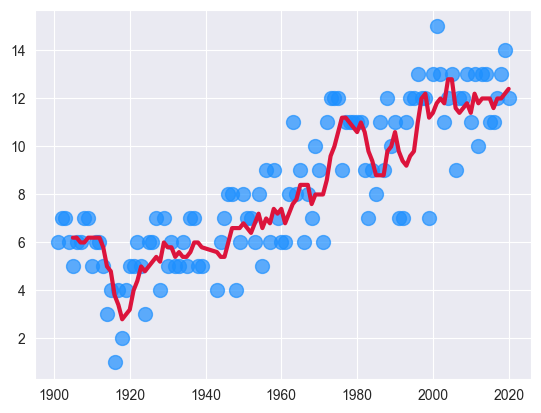

In [162]:
# 연도별 수상 개수: scatter plot (파란 점).
# 5년 이동 평균: line plot (빨간 선).

plt.scatter(x=prizes_per_year.index,
           y=prizes_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

plt.plot(prizes_per_year.index,
        prizes_per_year_rolling.values,
        c='crimson',
        linewidth=3,)

plt.show()

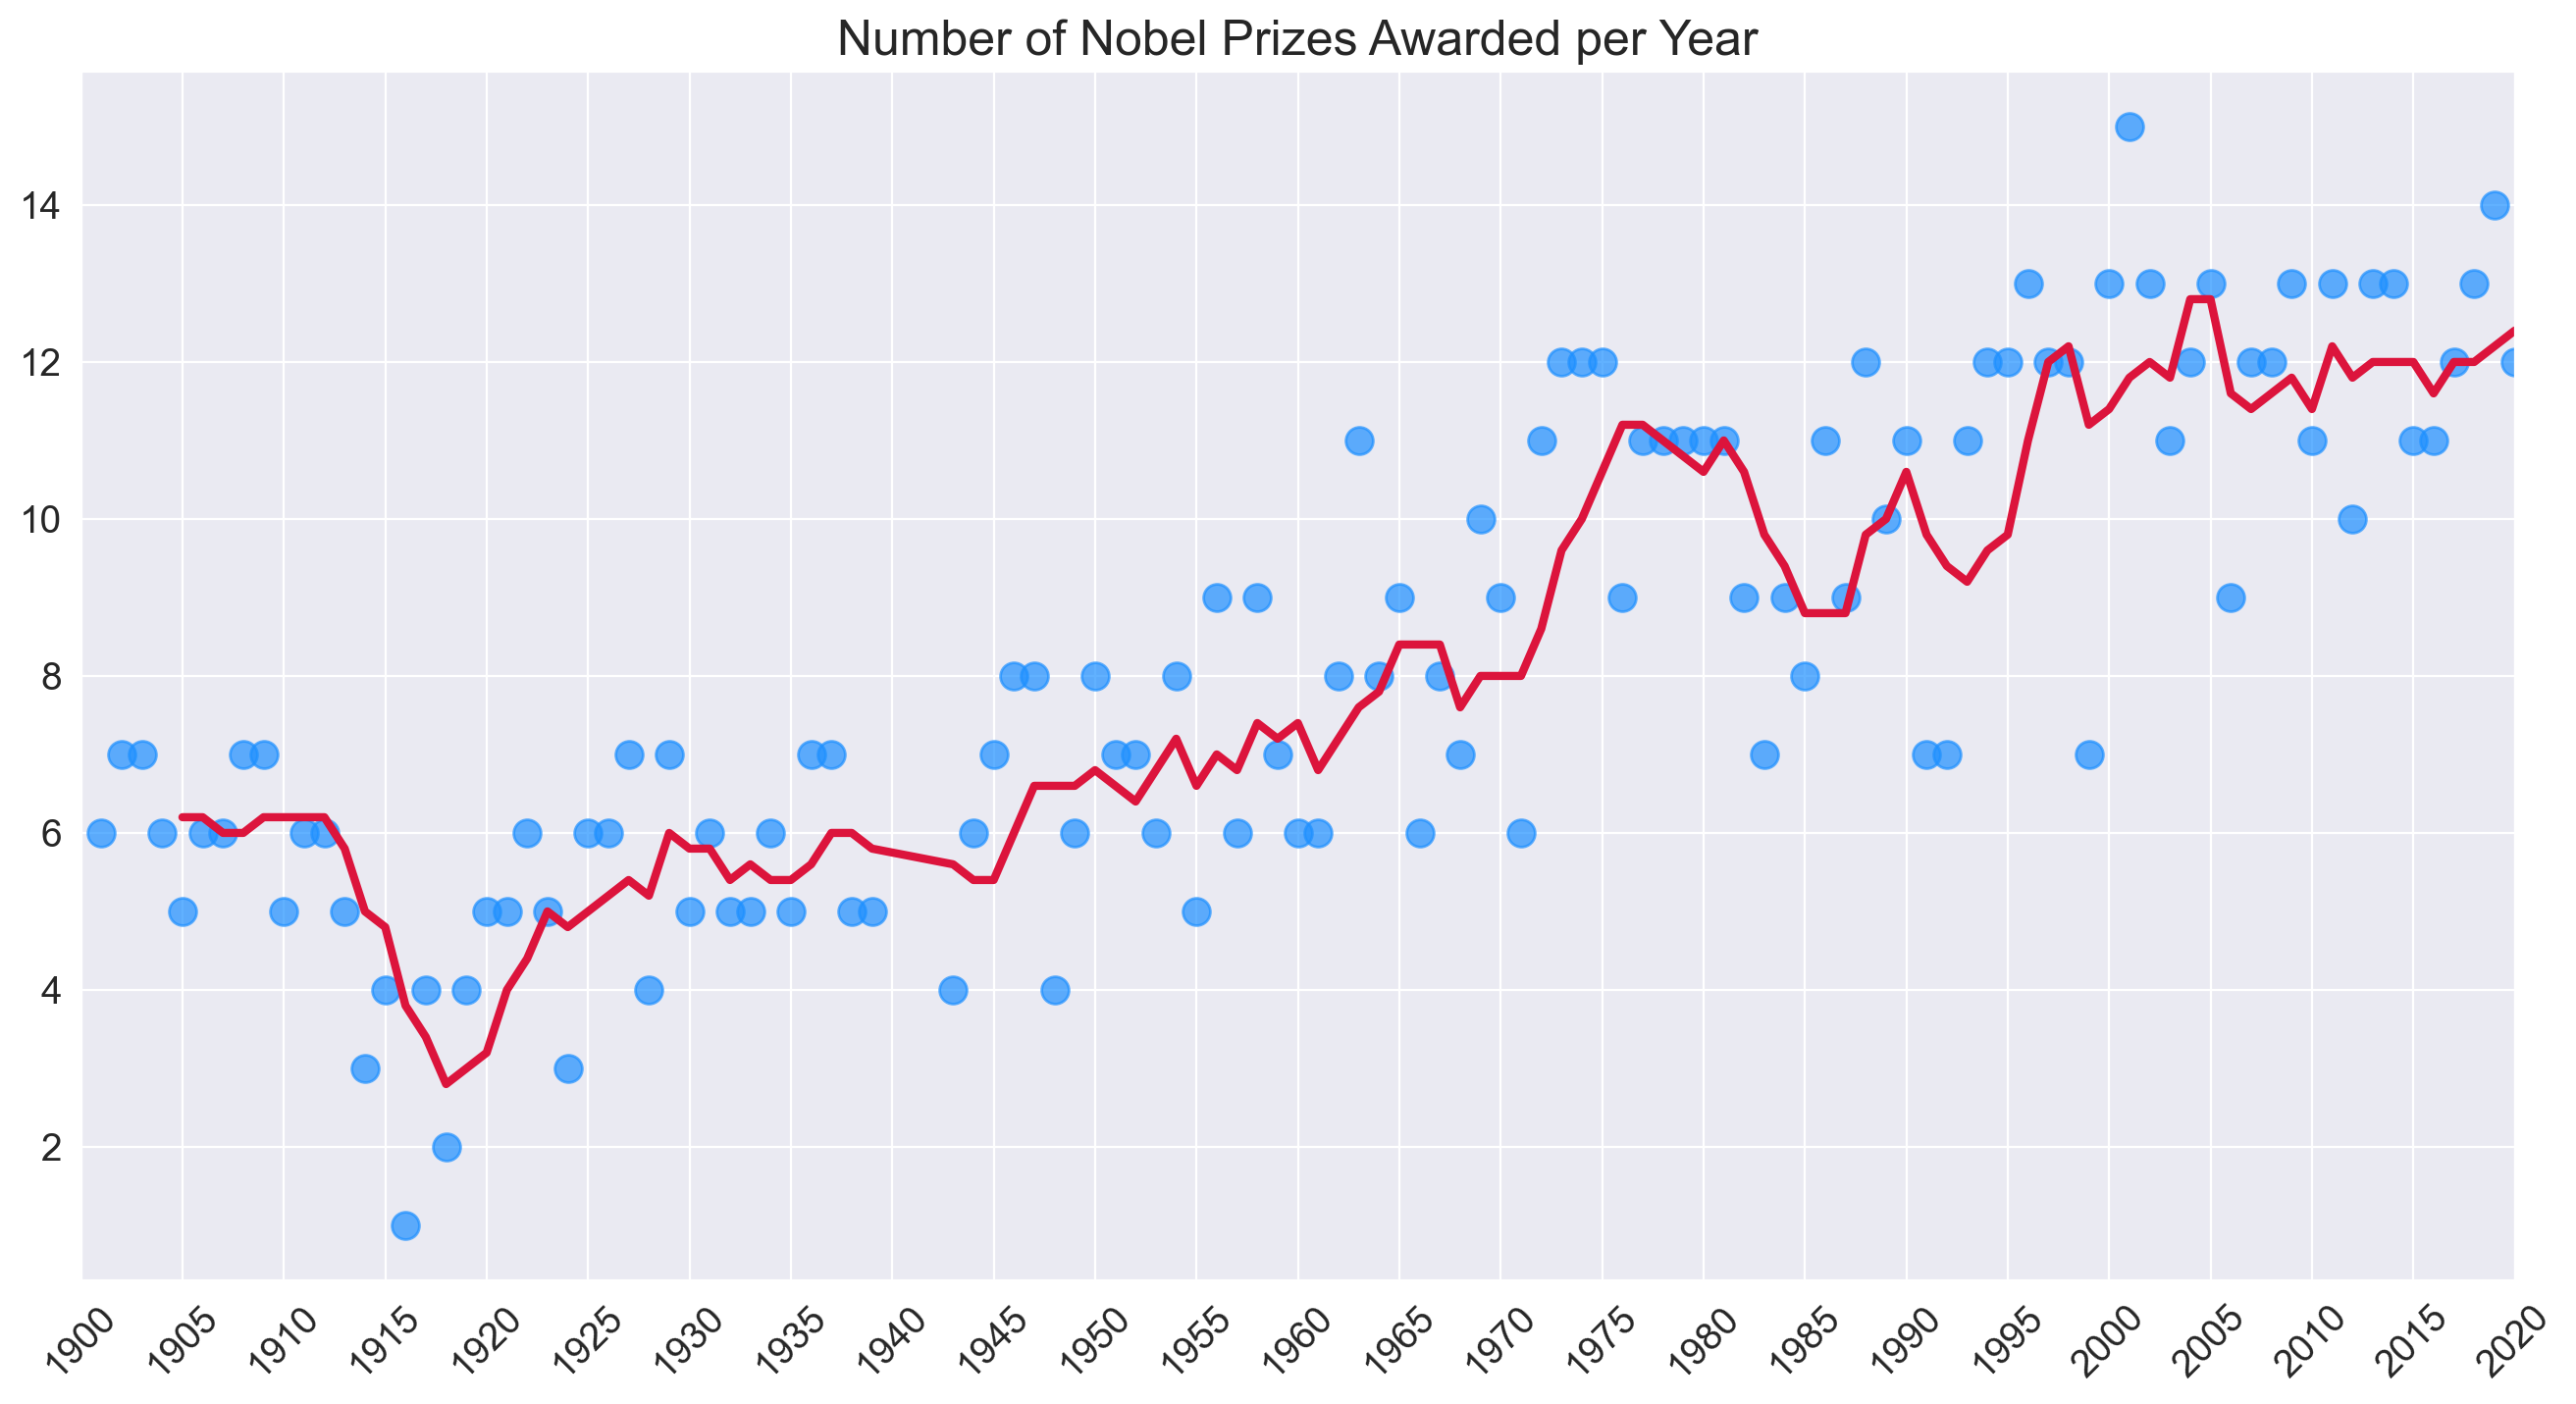

In [163]:
# 그래프 크기와 해상도를 설정
plt.figure(figsize=(16, 8), dpi=200)

# 그래프 제목과 제목 폰트 크기 설정
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)

# y축 눈금 폰트 크기 설정
plt.yticks(fontsize=14)

# x축 눈금 설정: 1900~2020년까지 5년 간격, 폰트 크기와 회전 각도 설정
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

# 현재의 축 객체 가져오기
ax = plt.gca()  # gca: get current axis

# x축 범위 설정 (1900년부터 2020년까지)
ax.set_xlim(1900, 2020)

# 산점도(scatter plot) 추가: 연도별 수상된 노벨상 개수를 표시
ax.scatter(
    x=prizes_per_year.index,    # x축 데이터: 연도 (prize_per_year의 인덱스)
    y=prizes_per_year.values,   # y축 데이터: 해당 연도의 수상 개수
    c='dodgerblue',            # 점 색상: dodgerblue
    alpha=0.7,                 # 투명도: 0.7
    s=100,                     # 점 크기: 100
)

# 이동 평균(5년 이동 평균)을 선 그래프로 추가
ax.plot(
    prizes_per_year.index,              # x축 데이터: 연도 (prize_per_year의 인덱스)
    prizes_per_year_rolling.values,     # y축 데이터: 평균 5년 값
    c='crimson',                        # 선 색상: crimson
    linewidth=3,                        # 선 두께: 3
)

# 그래프 출력
plt.show()

# 차트 분석: 1차, 2차 세계 대전이 시상 횟수에 미친 영향

## 1. 1차 세계 대전 (1914~1918)
- **차트 관찰**:
  - 1914년부터 1918년까지 시상 횟수가 급격히 감소.
  - 특히, 1916~1918년 사이에는 거의 시상이 이루어지지 않음.

- **이유**:
  - 1차 세계 대전 동안 많은 국가가 전쟁에 집중하면서 학문적, 평화적 활동이 위축됨.
  - 노벨상 후보 심사 및 시상 프로세스가 중단되었을 가능성이 높음.

---

## 2. 2차 세계 대전 (1939~1945)
- **차트 관찰**:
  - 1939년부터 1945년까지 시상 횟수가 크게 감소.
  - 1940~1943년 사이에는 시상이 거의 이루어지지 않음.

- **이유**:
  - 2차 세계 대전으로 인해 유럽 전역과 많은 국가가 전쟁에 휘말림.
  - 노벨상 후보 추천 및 선정 과정이 차질을 빚었으며, 학문 및 평화 활동 역시 크게 제한됨.

---

## 차트에서 나타나는 추세와 이유

### 1. 전쟁 이후 시상 횟수 증가
- **전쟁 종료 후 (1945년 이후)**:
  - 1950년대부터 시상 횟수가 꾸준히 증가하는 추세를 보임.

- **이유**:
  - **과학 기술의 발전**: 전쟁 중 개발된 기술이 전후 과학 발전으로 이어짐.
  - **새로운 부문 추가**: 1969년 노벨 경제학상이 추가되며 수상 부문이 확장됨.
  - **더 많은 국가의 참여**: 전 세계적으로 노벨상 후보와 수상자가 다양해짐.

---

### 2. 지속적인 증가
- **1970년대 이후**:
  - 시상 횟수는 안정적이고 높은 수준을 유지.

- **이유**:
  - **글로벌화**: 더 많은 연구자와 평화 단체가 노벨상 후보로 추천됨.
  - **전문 분야의 세분화**: 과학 및 문학 부문에서 정교하고 다양한 연구가 이루어짐.

---

## 결론
- **세계 대전의 영향**:
  - 1차 및 2차 세계 대전 동안 시상 횟수가 크게 감소. 이는 전쟁으로 인해 학문적 및 평화적 활동이 중단되었기 때문.

- **추세 분석**:
  - 전쟁 이후 과학 기술의 발전, 노벨상 부문 확장, 글로벌화 등의 요인으로 시상 횟수가 증가하는 경향을 보임.

이 차트는 노벨상이 세계적인 사건, 특히 전쟁에 민감하게 반응했다는 것을 보여줍니다. 전쟁의 여파를 극복한 이후, 노벨상은 더 많은 국가와 연구를 포괄하는 방향으로 발전해 왔습니다.


# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [164]:
# 1. 연도별 상 공유 비율 계산
# 'prize_share' 열을 나누어 각 수상자가 상을 나눠 갖는 비율을 계산
df_data['share_fraction'] = df_data['prize_share'].str.split('/').apply(lambda x: int(x[0]) / int(x[1]))

# 연도별로 상 공유 비율의 평균을 계산
yearly_avg_share = df_data.groupby('year')['share_fraction'].mean()
print(yearly_avg_share)

year
1901   0.83
1902   0.71
1903   0.71
1904   0.83
1905   1.00
       ... 
2016   0.55
2017   0.50
2018   0.46
2019   0.43
2020   0.50
Name: share_fraction, Length: 117, dtype: float64


In [165]:
# 2. 5년 이동 평균 계산
# 연도별 평균 상 공유 비율에 대해 5년 이동 평균을 계산
rolling_avg_share = yearly_avg_share.rolling(window=5).mean()
print(rolling_avg_share)

year
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   0.82
       ... 
2016   0.52
2017   0.50
2018   0.50
2019   0.50
2020   0.49
Name: share_fraction, Length: 117, dtype: float64


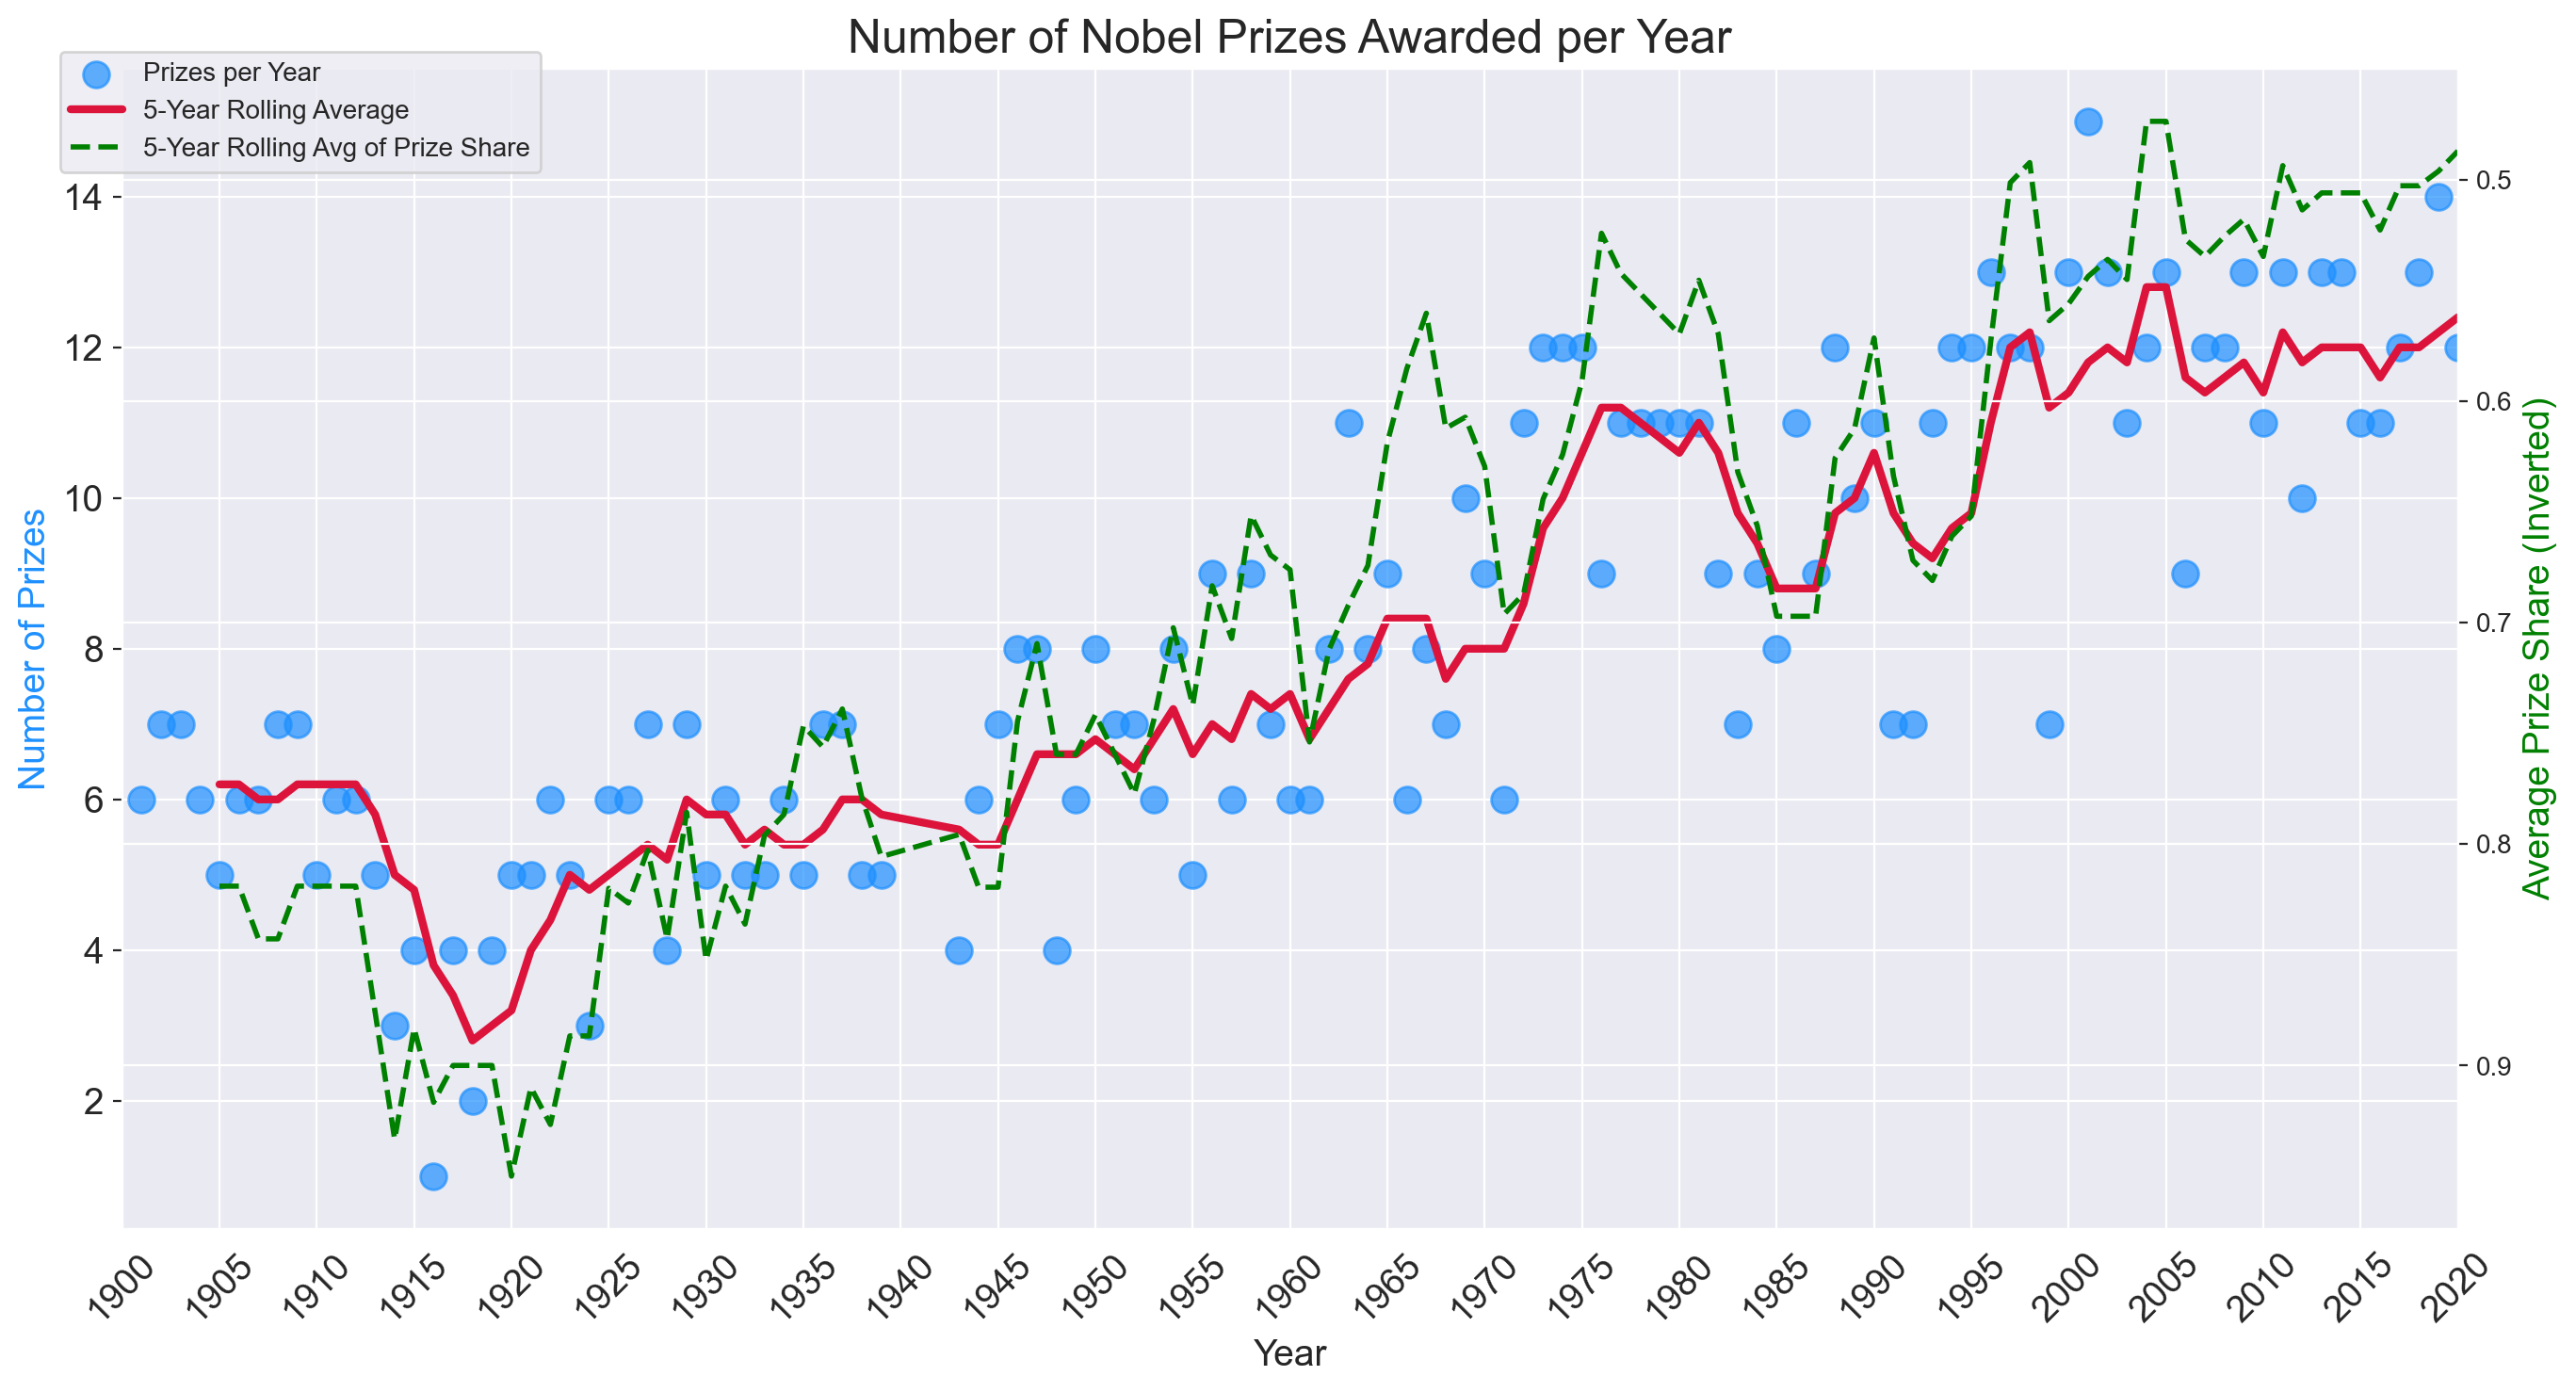

In [166]:
# 기존 그래프 생성
plt.figure(figsize=(16, 8), dpi=200)  # 그래프 크기와 해상도 설정

# 그래프 제목 설정
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)

# y축 눈금 폰트 크기 설정
plt.yticks(fontsize=14)

# x축 눈금 설정 (1900~2020년까지 5년 간격, 폰트 크기와 회전 각도 설정)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)

# 메인 축 설정
ax = plt.gca()  # 현재 축 가져오기
ax.set_xlim(1900, 2020)  # x축 범위 설정

# 산점도 추가: 연도별 수상 횟수
ax.scatter(
    x=prizes_per_year.index,  # x축 데이터: 연도
    y=prizes_per_year.values,  # y축 데이터: 수상 개수
    c='dodgerblue',  # 점 색상
    alpha=0.7,  # 투명도
    s=100,  # 점 크기
    label='Prizes per Year'  # 범례 이름
)

# 이동 평균 추가: 5년 이동 평균 선 그래프
ax.plot(
    prizes_per_year.index,  # x축 데이터
    prizes_per_year_rolling.values,  # y축 데이터: 이동 평균
    c='crimson',  # 선 색상
    linewidth=3,  # 선 두께
    label='5-Year Rolling Average'  # 범례 이름
)

# 보조 y축 추가 (상 공유 비율)
ax2 = ax.twinx()  # 메인 축과 x축 공유하는 보조 y축 생성
ax2.plot(
    rolling_avg_share.index,  # x축 데이터: 연도
    rolling_avg_share.values,  # y축 데이터: 5년 이동 평균 상 공유 비율
    c='green',  # 선 색상
    linewidth=2,  # 선 두께
    linestyle='--',  # 선 스타일: 점선
    label='5-Year Rolling Avg of Prize Share'  # 범례 이름
)

# 보조 y축 반전
ax2.invert_yaxis()  # y축 값을 반전하여 그래프 가독성 개선

# 축 제목 설정
ax.set_xlabel('Year', fontsize=14)  # x축 제목 설정
ax.set_ylabel('Number of Prizes', fontsize=14, color='dodgerblue')  # 메인 y축 제목
ax2.set_ylabel('Average Prize Share (Inverted)', fontsize=14, color='green')  # 보조 y축 제목

# 범례 추가 (메인 축과 보조 축 범례 통합)
fig = plt.gcf()  # 현재 그래프 가져오기
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))  # 범례 위치 설정

# 그래프 출력
plt.show()


## 1. 데이터 준비
- `yearly_avg_share`:
  - 연도별 상 공유 비율(share_pct)의 평균값을 계산합니다.
  - `groupby('year')`를 사용하여 연도를 기준으로 데이터를 그룹화.
  - `agg({'share_pct': pd.Series.mean})`로 평균 값을 계산.
- `share_moving_average`:
  - 연도별 평균 상 공유 비율의 5년 이동 평균을 계산합니다.
  - `rolling(window=5).mean()`으로 5년 이동 평균을 적용.

In [167]:
# 연도별 상 공유 비율 계산
yearly_avg_share = df_data.groupby(by='year').agg({'share_pct': pd.Series.mean})  # 연도별로 상 공유 비율의 평균 계산
share_moving_average = yearly_avg_share.rolling(window=5).mean()  # 5년 이동 평균 계산
print(share_moving_average)  # 이동 평균 결과 출력

      share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905      81.90
...         ...
2016      52.28
2017      50.28
2018      50.28
2019      49.62
2020      48.71

[117 rows x 1 columns]


## 2. 첫 번째 그래프: 기본 시각화
- **x축**: 연도 (1900~2020).
- **메인 y축**: 노벨상 수상 횟수.
  - `scatter`: 연도별 수상 횟수를 점으로 표시.
  - `plot`: 5년 이동 평균을 선으로 표시.
- **보조 y축**: 상 공유 비율의 5년 이동 평균.
  - `plot`: 회색 점선으로 표시.

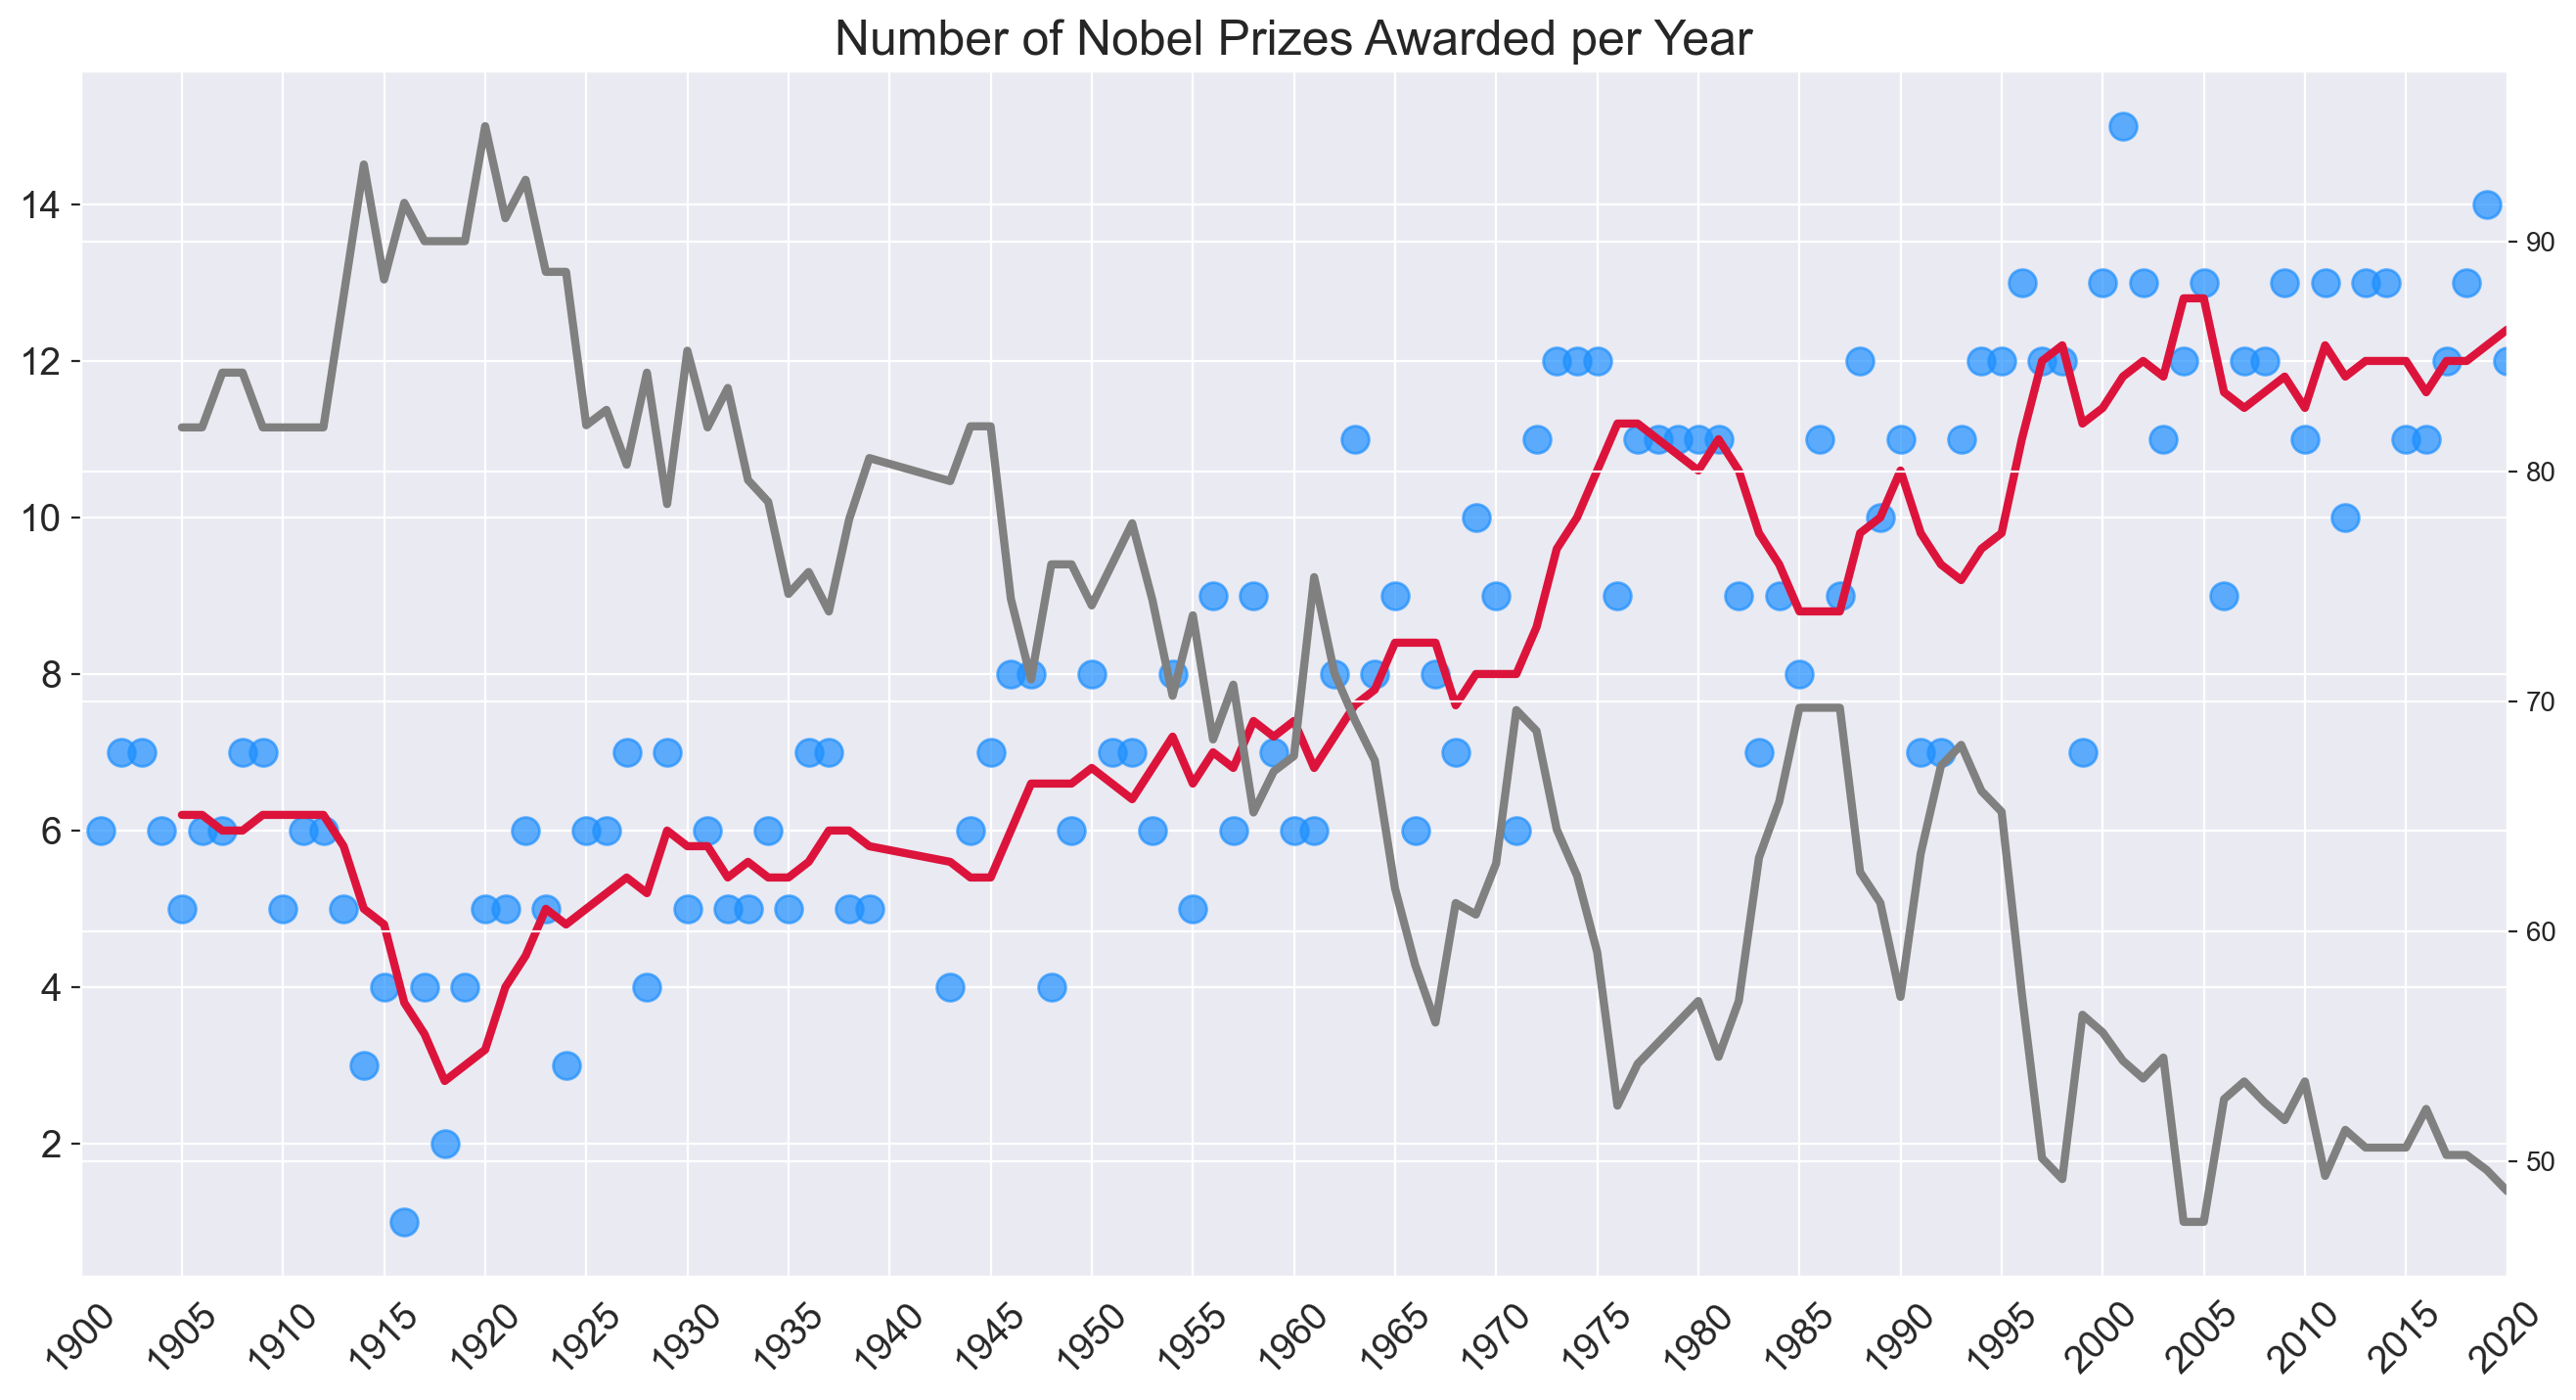

In [168]:
# 첫 번째 그래프: 기본 그래프 생성
plt.figure(figsize=(16, 8), dpi=200)  # 그래프 크기와 해상도 설정
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)  # 제목과 제목 폰트 크기 설정
plt.yticks(fontsize=14)  # y축 눈금 폰트 크기 설정
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)  # x축 눈금 설정 (1900~2020, 5년 간격)

ax1 = plt.gca()  # 현재 축 객체 가져오기
ax2 = ax1.twinx()  # 보조 y축 생성 (x축은 공유)

ax1.set_xlim(1900, 2020)  # x축 범위 설정

# 메인 y축: 수상 횟수 시각화
ax1.scatter(
    x=prizes_per_year.index,  # x축: 연도
    y=prizes_per_year.values,  # y축: 수상 횟수
    c='dodgerblue',  # 점 색상
    alpha=0.7,  # 점 투명도
    s=100,  # 점 크기
)
ax1.plot(
    prizes_per_year.index,  # x축: 연도
    prizes_per_year_rolling.values,  # y축: 5년 이동 평균
    c='crimson',  # 선 색상
    linewidth=3,  # 선 두께
)

# 보조 y축: 상 공유 비율 시각화
ax2.plot(
    prizes_per_year.index,  # x축: 연도
    share_moving_average.values,  # y축: 5년 이동 평균 상 공유 비율
    c='grey',  # 선 색상
    linewidth=3,  # 선 두께
)

plt.show()  # 그래프 출력

## 3. 두 번째 그래프: 보조 y축 반전
- **보조 y축 반전**:
  - 상 공유 비율이 시간이 지남에 따라 증가하는 것을 명확히 보여주기 위해 y축을 반전.
  - `ax2.invert_yaxis()`를 사용하여 y축을 위아래로 뒤집음.
- 나머지 시각화는 첫 번째 그래프와 동일.

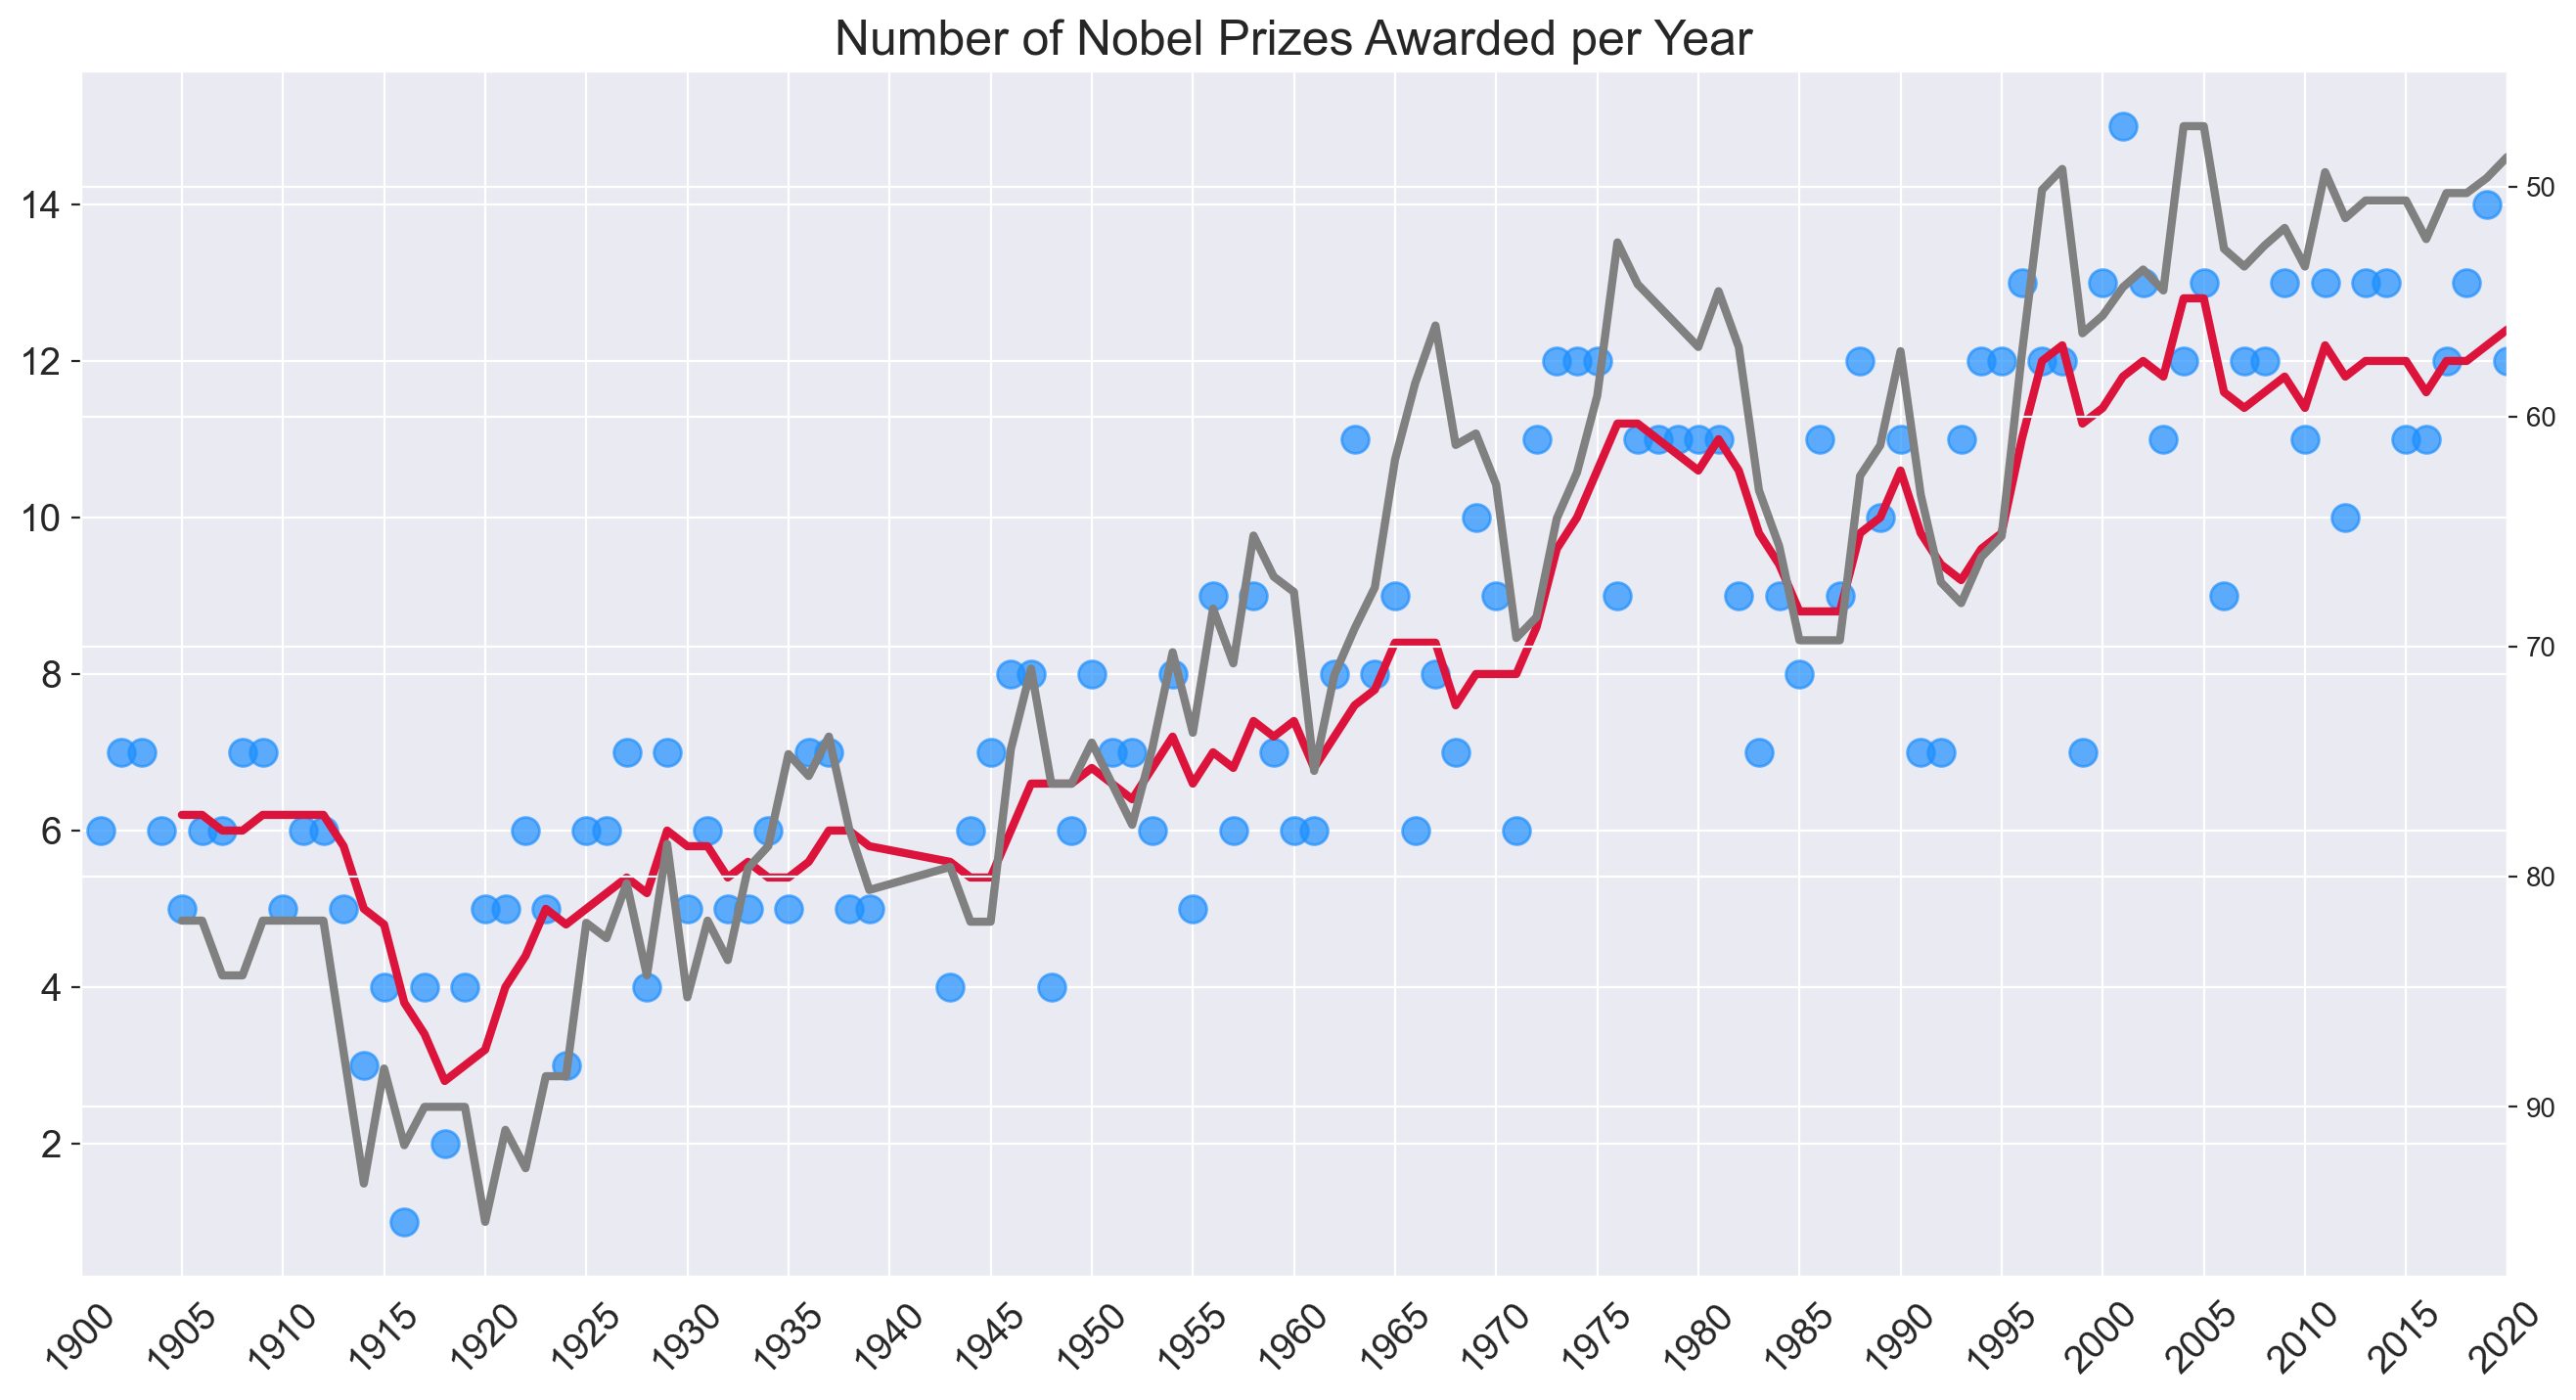

In [169]:
# 두 번째 그래프: 보조 y축 반전
plt.figure(figsize=(16, 8), dpi=200)  # 그래프 크기와 해상도 설정
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)  # 제목과 제목 폰트 크기 설정
plt.yticks(fontsize=14)  # y축 눈금 폰트 크기 설정
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=14, rotation=45)  # x축 눈금 설정 (1900~2020, 5년 간격)

ax1 = plt.gca()  # 현재 축 객체 가져오기
ax2 = ax1.twinx()  # 보조 y축 생성 (x축은 공유)
ax1.set_xlim(1900, 2020)  # x축 범위 설정

ax2.invert_yaxis()  # 보조 y축 반전

# 메인 y축: 수상 횟수 시각화
ax1.scatter(
    x=prizes_per_year.index,  # x축: 연도
    y=prizes_per_year.values,  # y축: 수상 횟수
    c='dodgerblue',  # 점 색상
    alpha=0.7,  # 점 투명도
    s=100,  # 점 크기
)
ax1.plot(
    prizes_per_year.index,  # x축: 연도
    prizes_per_year_rolling.values,  # y축: 5년 이동 평균
    c='crimson',  # 선 색상
    linewidth=3,  # 선 두께
)

# 보조 y축: 상 공유 비율 시각화
ax2.plot(
    prizes_per_year.index,  # x축: 연도
    share_moving_average.values,  # y축: 5년 이동 평균 상 공유 비율
    c='grey',  # 선 색상
    linewidth=3,  # 선 두께
)

plt.show()  # 그래프 출력


## 4. 분석 포인트
1. **수상 횟수와 상 공유 비율의 관계**:
   - 수상 횟수와 상 공유 비율이 어떻게 변화하는지 확인.
2. **5년 이동 평균**:
   - 이동 평균을 통해 데이터의 변동성을 줄이고 추세를 확인.
3. **보조 y축 반전 효과**:
   - 반전된 보조 축을 통해 상 공유 비율의 증가 경향을 강조.

---

### 코드에서 사용된 주요 메서드
- `groupby`: 데이터를 특정 기준으로 그룹화.
- `agg`: 그룹화된 데이터에 통계 함수 적용.
- `rolling`: 이동 평균 계산.
- `twinx`: 보조 y축 생성.
- `invert_yaxis`: 보조 y축 반전.

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

# 국가별 총 수상 횟수 분석: 열 선택 가이드

노벨상 수상 데이터를 기반으로 국가별 총 수상 횟수를 분석할 때, 사용할 수 있는 주요 열은 다음 세 가지입니다:
- **`birth_country`**: 수상자가 태어난 국가.
- **`birth_country_current`**: 수상자가 태어난 도시가 속하는 현재 국가.
- **`organization_country`**: 수상자가 소속된 조직의 국가.

각 열의 특징과 문제점을 정리하고, 최적의 선택을 제안합니다.



---

## 1. **`birth_country`**
### 특징
- **설명**: 수상자가 태어난 국가를 기준으로 분석합니다.
- **장점**:
  - 역사적 관점을 반영하며, 수상자의 출생지 정보를 정확히 보여줍니다.
- **단점**:
  - **국가 경계 변경 문제**:
    - 예: 소비에트 연방(USSR), 체코슬로바키아 같은 더 이상 존재하지 않는 국가.
    - 역사적 국가 경계에 따라 결과가 왜곡될 수 있음.
  - **국적과 출생 국가 불일치**:
    - 출생 후 이민이나 시민권 취득 등으로 실제 국적과 상관이 없을 수 있음.

---

In [170]:
# 국가별 총 수상횟수 "birth_country"
top20_countries_birth_country = df_data.groupby('birth_country').size().nlargest(20).reset_index()
top20_countries_birth_country.columns = ['country', 'prize']
print(top20_countries_birth_country)

                     country  prize
0   United States of America    281
1             United Kingdom     91
2                    Germany     65
3                     France     54
4                     Sweden     29
5                      Japan     27
6                     Canada     20
7                Switzerland     19
8                Netherlands     18
9                      Italy     17
10                    Russia     17
11                   Austria     15
12                    Norway     12
13                     China     11
14                   Denmark     11
15                 Australia     10
16                   Belgium      9
17                  Scotland      9
18              South Africa      9
19          Germany (Poland)      8


## 2. **`birth_country_current`**
### 특징
- **설명**: 수상자가 태어난 도시가 속하는 현재 국가를 기준으로 분석합니다.
- **장점**:
  - **현대적 국가 경계 반영**:
    - 현재의 국가 경계와 일치하므로 데이터가 최신 상황을 잘 반영.
  - **문제점 최소화**:
    - 더 이상 존재하지 않는 국가(예: 소비에트 연방)를 처리할 필요가 없음.
  - **결과의 명확성**:
    - 수상자의 출생지를 현대적 맥락에서 이해할 수 있음.
- **단점**:
  - 출생 당시의 국가와 현재 국가가 다를 수 있음.

---


In [171]:
# 국가별 총 수상횟수 "birth_country_current"
top20_countries_birth_country_current = df_data.groupby('birth_country_current').size().nlargest(20).reset_index()
top20_countries_birth_country_current.columns = ['country', 'prize']
print(top20_countries_birth_country_current)

                     country  prize
0   United States of America    281
1             United Kingdom    105
2                    Germany     84
3                     France     57
4                     Sweden     29
5                      Japan     27
6                     Poland     27
7                     Russia     26
8                     Canada     20
9                      Italy     19
10               Switzerland     19
11                   Austria     18
12               Netherlands     18
13                     China     12
14                   Denmark     12
15                    Norway     12
16                 Australia     10
17                   Belgium      9
18                   Hungary      9
19                     India      9


## 3. **`organization_country`**
### 특징
- **설명**: 수상자가 소속된 조직(연구소, 대학 등)의 국가를 기준으로 분석합니다.
- **장점**:
  - 노벨상 수상에 영향을 미친 **조직과 국가의 역할**을 평가 가능.
  - 국제적 연구 협력이나 특정 조직의 기여도 분석에 적합.
- **단점**:
  - **수상자 개인의 출생지와 상관없음**:
    - 연구소나 대학이 다른 국가에 위치한 경우 데이터 해석이 왜곡될 수 있음.
  - **조직 중심의 분석**:
    - 개인적인 업적보다는 조직의 국가적 기여도로 치우칠 가능성.

---

In [172]:
# 국가별 총 수상횟수 "organization_country"
top20_countries_organization_country = df_data.groupby('organization_country').size().nlargest(20).reset_index()
top20_countries_organization_country.columns = ['country', 'prize']
print(top20_countries_organization_country)

                     country  prize
0   United States of America    368
1             United Kingdom     93
2                    Germany     67
3                     France     38
4                Switzerland     24
5                      Japan     18
6                     Sweden     17
7                     Russia     12
8                Netherlands     11
9                     Canada      9
10                   Denmark      8
11                   Austria      6
12                     Italy      6
13                 Australia      5
14                   Belgium      5
15                    Israel      5
16                    Norway      5
17                 Argentina      2
18                     China      1
19            Czech Republic      1



## 4. **결론: 최적의 선택**
- **추천 열**: **`birth_country_current`**
  - 현대적 국가 경계를 반영하여 현재 국가 기준으로 분석 가능.
  - 역사적 데이터의 복잡성을 최소화하고, 데이터 왜곡 가능성을 줄임.
  - **분석의 일관성**을 유지하면서도, 수상자의 출생지와 현재 국가를 명확히 연결.

---

## 5. **팁 및 주의점**
1. **분석 목적에 따라 열 선택**:
   - **수상자의 출생 국가를 중점적으로 분석**하려면 `birth_country`.
   - **현재 국가 경계를 기준으로 분석**하려면 `birth_country_current`.
   - **조직과 국가 기여도 분석**이 목적이라면 `organization_country`.

2. **데이터 왜곡 방지**:
   - 국가 경계 변화나 데이터 중복 문제를 고려해 열을 신중히 선택.

3. **후속 작업**:
   - 선택된 열을 기반으로 데이터 시각화 및 분석을 진행.
   - 국가별, 분야별, 연도별로 추가적인 그룹화와 시각화를 시도.

---

# 가로 막대 그래프 생성 및 설명

이 코드는 상위 20개 국가의 노벨상 수상 횟수를 수평 막대 그래프로 시각화합니다. 데이터를 분석하고 시각화할 때 사용된 주요 코드와 시각화 설정을 설명합니다.

---

## 주요 코드 설명

1. **`px.bar`**:
   - Plotly의 막대 그래프 생성 함수입니다.
   - 여기서는 **가로 방향(horizontal)**으로 막대를 그립니다.

2. **데이터와 축 설정**:
   - `data_frame=top20_countries_birth_country_current`: 국가별 수상 횟수 상위 20개 데이터프레임.
   - `x='prize'`: x축에는 수상 횟수를 표시.
   - `y='country'`: y축에는 국가 이름을 표시.
   - `orientation='h'`: 막대 방향을 수평으로 설정.

3. **그래프 제목 및 레이블**:
   - `title`: 그래프 제목을 설정합니다.
   - `labels`: x축(`prize`)과 y축(`country`)의 레이블을 읽기 쉽게 설정.

4. **색상 설정**:
   - `color='prize'`: 수상 횟수에 따라 막대 색상을 지정.
   - `color_continuous_scale='Viridis'`: Viridis 색상 스케일을 사용하여 수상 횟수에 따라 막대 색상을 그라데이션 처리.

5. **y축 정렬**:
   - `update_layout(yaxis={'categoryorder': 'total ascending'})`: y축(국가 이름)을 수상 횟수 기준으로 오름차순 정렬합니다.

6. **그래프 출력**:
   - `fig.show()`: 생성한 그래프를 출력합니다.

---


In [173]:
# 가로 막대 그래프 생성
fig = px.bar(
    top20_countries_birth_country_current,  # 데이터프레임: 국가별 수상 횟수 상위 20개 데이터
    x='prize',  # x축: 수상 횟수
    y='country',  # y축: 국가 이름
    orientation='h',  # 막대 방향: 수평(horizontal)
    title='Top 20 Countries by Nobel Prizes Won',  # 그래프 제목
    labels={'prize': 'Number of Prizes', 'country': 'Country'},  # 축 레이블 설정
    color='prize',  # 막대 색상: 수상 횟수에 따라 색상 적용
    color_continuous_scale='Viridis'  # 색상 스케일: Viridis 사용
)

# y축을 수상 횟수에 따라 정렬
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},  # y축 정렬: 수상 횟수 기준 오름차순
    height=800  # 그래프 높이 조정
)

# 그래프 출력
fig.show()

In [174]:
# 그룹화 기준: 현재 국가  # 그룹화된 열을 인덱스로 사용하지 않음  # 각 국가별로 'prize' 열의 데이터 개수 계산
top_countries = df_data.groupby(['birth_country_current'],
                                  as_index=False).agg({'prize': pd.Series.count})

# 수상 횟수를 기준으로 데이터프레임 정렬
top_countries.sort_values(by='prize', inplace=True)  # 'prize' 열 기준으로 오름차순 정렬

# 상위 20개 국가 추출
top20_countries = top_countries[-20:]  # 정렬된 데이터의 마지막 20개 행을 선택하여 상위 20개 국가 추출

# 결과 출력
print(top20_countries)  # 상위 20개 국가와 각 국가별 수상 횟수 출력

       birth_country_current  prize
33                     India      9
31                   Hungary      9
65              South Africa      9
2                  Australia     10
20                   Denmark     12
13                     China     12
54                    Norway     12
3                    Austria     18
51               Netherlands     18
39                     Italy     19
68               Switzerland     19
11                    Canada     20
61                    Russia     26
57                    Poland     27
40                     Japan     27
67                    Sweden     29
25                    France     57
26                   Germany     84
73            United Kingdom    105
74  United States of America    281


In [175]:
# Plotly 가로 막대 그래프 생성
h_bar = px.bar(
    x=top20_countries.prize,  # x축 데이터: 수상 횟수
    y=top20_countries.birth_country_current,  # y축 데이터: 국가 이름
    orientation='h',  # 막대 방향: 수평(horizontal)
    color=top20_countries.prize,  # 색상 데이터: 수상 횟수 (막대 색상을 수상 횟수에 따라 설정)
    color_continuous_scale='Viridis',  # 색상 스케일: Viridis 사용
    title='Top 20 Countries by Number of Prizes'  # 그래프 제목 설정
)

# 그래프 레이아웃 업데이트
h_bar.update_layout(
    xaxis_title='Number of Prizes',  # x축 제목 설정
    yaxis_title='Country',  # y축 제목 설정
    coloraxis_showscale=False,  # 색상 축(color axis) 표시 숨김
    height=800,  # 그래프 높이 조정
    yaxis=dict(tickfont=dict(size=12), tickangle=0)  # y축 글자 크기와 각도 조정
)

# 그래프 출력
h_bar.show()


# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [176]:
# 국가별 수상 횟수 계산
# 1. 국가와 ISO 코드별로 데이터를 그룹화
df_countries = df_data.groupby(['birth_country_current', 'ISO'],
                               as_index=False).agg({'prize': pd.Series.count})
# 2. 수상 횟수를 기준으로 데이터프레임 정렬
df_countries.sort_values('prize', ascending=False)

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
63                  Slovakia  SVK      1
75                 Venezuela  VEN      1
76                   Vietnam  VNM      1
77                     Yemen  YEM      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

In [177]:
# 단계구분도(Choropleth Map) 생성

# Plotly 단계구분도 생성
world_map = px.choropleth(
    df_countries,                      # 데이터프레임: 국가별 수상 횟수를 포함한 데이터
    locations='ISO',                   # ISO 코드 기준으로 국가를 매핑
    color='prize',                     # 색상 값: 각 국가의 수상 횟수
    hover_name='birth_country_current',# 마우스 오버 시 표시할 국가 이름
    color_continuous_scale=px.colors.sequential.matter  # 색상 스케일: matter 사용 (연속 색상)
)

# 단계구분도의 레이아웃 업데이트
world_map.update_layout(
    coloraxis_showscale=True  # 색상 스케일(legend) 표시 설정
)

# 단계구분도 출력
world_map.show()  # 생성된 그래프를 화면에 출력


In [178]:
# 물리학 분야 노벨상 데이터 필터링
physics_prizes = df_data[df_data['category'] == 'Physics']  # 'Physics'(물리학) 분야의 데이터만 필터링

# 물리학 노벨상 수상 횟수를 국가별로 그룹화
df_physics_countries = physics_prizes.groupby(
    ['birth_country_current', 'ISO'],  # 그룹화 기준: 현재 국가와 ISO 코드
    as_index=False                     # 그룹화된 열을 인덱스로 사용하지 않음
).agg(
    {'prize': 'count'}                 # 'prize' 열의 개수를 계산하여 국가별 수상 횟수를 집계
)

# 물리학 분야 단계구분도 생성
world_map = px.choropleth(
    df_physics_countries,             # 데이터프레임: 국가별 물리학 노벨상 수상 횟수
    locations='ISO',                  # ISO 코드 기준으로 국가 매핑
    color='prize',                    # 색상 값: 각 국가의 수상 횟수
    hover_name='birth_country_current',  # 마우스 오버 시 표시할 국가 이름
    color_continuous_scale='Blues',   # 색상 스케일: 파란색(Blues) 계열 사용
    title='Number of Nobel Prizes in Physics by Country'  # 그래프 제목
)

# 단계구분도 출력
world_map.show()  # 물리학 분야 단계구분도 시각화

In [179]:
# 연도별로 국가별 수상 횟수를 계산
df_time_series = df_data.groupby(
    ['year', 'birth_country_current', 'ISO'],  # 그룹화 기준: 연도, 현재 국가, ISO 코드
    as_index=False                            # 그룹화된 열을 인덱스로 사용하지 않음
).agg(
    {'prize': 'count'}                         # 'prize' 열의 개수를 계산하여 연도별 국가별 수상 횟수 집계
)

# 국가별로 누적 수상 횟수 계산
df_time_series['cumulative_prizes'] = df_time_series.groupby(
    'birth_country_current'                   # 그룹화 기준: 현재 국가
)['prize'].cumsum()                           # 'prize' 열의 누적 합을 계산하여 누적 수상 횟수를 생성

# 누적 수상 횟수 단계구분도 생성
world_map = px.choropleth(
    df_time_series,                           # 데이터프레임: 연도별 누적 수상 횟수
    locations='ISO',                          # ISO 코드 기준으로 국가 매핑
    color='cumulative_prizes',                # 색상 값: 각 국가의 누적 수상 횟수
    hover_name='birth_country_current',       # 마우스 오버 시 표시할 국가 이름
    animation_frame='year',                   # 애니메이션 프레임: 연도별로 단계구분도 업데이트
    color_continuous_scale='Viridis',         # 색상 스케일: Viridis 계열 사용
    title='Cumulative Nobel Prizes by Country Over Time'  # 그래프 제목
)

# 단계구분도 출력
world_map.show()  # 누적 수상 횟수 단계구분도 시각화

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [180]:
# 국가별, 수상 분야별 데이터 그룹화
cat_country = df_data.groupby(
    ['birth_country_current', 'category'],  # 그룹화 기준: 현재 국가와 수상 분야(category)
    as_index=False                          # 그룹화된 열을 일반 열로 유지
).agg(
    {'prize': pd.Series.count}              # 그룹별 'prize' 열의 개수를 계산
)

# 그룹화된 데이터를 수상 횟수(prize)를 기준으로 내림차순 정렬
cat_country.sort_values(by='prize', ascending=False, inplace=True)

# 그룹화된 데이터 출력
print(cat_country)

        birth_country_current   category  prize
204  United States of America   Medicine     78
206  United States of America    Physics     70
201  United States of America  Chemistry     55
202  United States of America  Economics     49
198            United Kingdom   Medicine     28
..                        ...        ...    ...
190                    Turkey  Chemistry      1
207                 Venezuela   Medicine      1
208                   Vietnam      Peace      1
209                     Yemen      Peace      1
210                  Zimbabwe      Peace      1

[211 rows x 3 columns]


# 상위 20개 국가와 수상 분야별 데이터 병합 로직

## 1. **국가별, 수상 분야별 데이터 그룹화**
- 국가(`birth_country_current`)와 수상 분야(`category`)를 기준으로 그룹화하여 분야별 수상 횟수를 계산 (`cat_country` 생성).

## 2. **상위 20개 국가 데이터 준비**
- 전체 데이터를 기반으로 총 수상 횟수 기준 상위 20개 국가를 포함하는 데이터프레임 (`top20_countries` 생성).

## 3. **병합**
- `pd.merge()`를 사용하여 `cat_country`와 `top20_countries`를 **국가 이름(`birth_country_current`)** 기준으로 병합.
- **병합 결과**:
  - `top20_countries`에 포함되지 않은 국가는 자동으로 제외.

## 4. **열 이름 변경**
- 병합된 데이터프레임의 열 이름을 가독성을 위해 변경:
  - `birth_country_current`: 국가 이름.
  - `category`: 수상 분야.
  - `cat_prize`: 분야별 수상 횟수.
  - `total_prize`: 총 수상 횟수.

## 5. **정렬**
- `total_prize`(총 수상 횟수)를 기준으로 데이터프레임을 정렬하여 주요 국가 순으로 정렬.

## **결과**
- 상위 20개 국가의 각 수상 분야별 데이터프레임이 생성됩니다.

In [181]:
# 상위 20개 국가 데이터와 분야별 데이터(cat_country)를 병합
merged_df = pd.merge(
    cat_country,              # 분야별 데이터
    top20_countries,          # 상위 20개 국가 데이터
    on='birth_country_current'  # 병합 기준 열: 현재 국가 이름
)

# 병합된 데이터의 열 이름 변경
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
# birth_country_current: 국가 이름
# category: 수상 분야
# cat_prize: 분야별 수상 횟수
# total_prize: 총 수상 횟수

# 총 수상 횟수(total_prize)를 기준으로 병합된 데이터 정렬
merged_df.sort_values(by='total_prize', inplace=True)
print(merged_df)

        birth_country_current   category  cat_prize  total_prize
61               South Africa   Medicine          3            9
55                    Hungary  Chemistry          3            9
58               South Africa      Peace          3            9
81                    Hungary   Medicine          2            9
105                   Hungary  Economics          1            9
..                        ...        ...        ...          ...
3    United States of America  Economics         49          281
2    United States of America  Chemistry         55          281
9    United States of America      Peace         19          281
0    United States of America   Medicine         78          281
1    United States of America    Physics         70          281

[109 rows x 4 columns]


In [182]:
# 분야별로 상위 20개 국가의 수상 횟수를 막대 그래프로 시각화
cat_cntry_bar = px.bar(
    x=merged_df.cat_prize,               # x축: 분야별 수상 횟수
    y=merged_df.birth_country_current,  # y축: 국가 이름
    color=merged_df.category,           # 색상: 수상 분야(category)
    orientation='h',                    # 막대 방향: 수평(horizontal)
    title='Top 20 Countries by Number of Prizes and Category'  # 그래프 제목
)

# 그래프 레이아웃 설정
cat_cntry_bar.update_layout(
    xaxis_title='Number of Prizes',  # x축 제목
    yaxis_title='Country',           # y축 제목
    height=800                       # 그래프 높이 설정
)

# 그래프 출력
cat_cntry_bar.show()


In [183]:
# 국가별, 수상 분야별 데이터 그룹화
df_category_country = df_data.groupby(
    ['birth_country_current', 'category'],  # 그룹화 기준: 현재 국가와 수상 분야(category)
    as_index=False                          # 그룹화된 열을 일반 열로 유지
).agg(
    {'prize': 'count'}                      # 그룹별 'prize' 열의 개수를 계산
)

# 그룹화된 데이터 출력
print(df_category_country)

        birth_country_current    category  prize
0                     Algeria  Literature      1
1                     Algeria     Physics      1
2                   Argentina    Medicine      2
3                   Argentina       Peace      2
4                   Australia   Chemistry      1
..                        ...         ...    ...
206  United States of America     Physics     70
207                 Venezuela    Medicine      1
208                   Vietnam       Peace      1
209                     Yemen       Peace      1
210                  Zimbabwe       Peace      1

[211 rows x 3 columns]


In [184]:
# Plotly 막대 차트 생성
fig = px.bar(
    df_category_country,                    # 데이터프레임: 국가별, 수상 분야별 수상 횟수
    x='prize',                              # x축: 수상 횟수
    y='birth_country_current',              # y축: 국가 이름
    color='category',                       # 색상: 수상 분야(category)
    orientation='h',                        # 막대 방향: 수평(horizontal)
    title='Nobel Prizes by Country and Category',  # 그래프 제목
    labels={'prize': 'Number of Prizes', 'birth_country_current': 'Country'}  # 축 레이블 설정
)

# y축 정렬과 그래프 레이아웃 업데이트
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},  # y축 정렬: 수상 횟수 기준 오름차순
    height=1200  # 그래프 높이 설정
)

# 그래프 출력
fig.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line.

### **첫번째 방법 특징**
1. **데이터 그룹화**:
   - 국가(`birth_country_current`)와 연도(`year`)를 기준으로 그룹화 후 수상 횟수를 계산.

2. **누적 계산**:
   - `groupby()`와 `cumsum()`을 두 번 사용:
     - 첫 번째는 그룹화된 데이터에서 연도별 수상 횟수를 계산.
     - 두 번째는 국가별로 누적 수상 횟수를 계산.

3. **더 복잡한 처리 과정**:
   - 중간에 데이터 정렬 및 추가적인 `cumsum()` 계산 단계를 포함.
   - 처리 과정이 첫 번째 방법보다 복잡함.

4. **선형 차트 생성**:
   - 누적 수상 횟수(`prize`)를 y축 값으로 사용.
   - 국가별로 선의 색상을 구분하여 시각화.

In [185]:
# 국가별 연도별 수상 횟수 계산
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index=False).count()

# 연도별로 정렬한 뒤, 필요한 열만 선택 (연도, 국가, 수상 횟수)
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]

In [186]:
# 누적 수상 횟수 계산
cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
# 그룹화 기준: 현재 국가와 연도 by=['birth_country_current', 'year']
# 그룹별로 수상 횟수 합계 계산 ).sum()
# 국가별로 다시 그룹화 .groupby(level=[0])
# 국가별 누적 합계 계산 .cumsum()

# 누적 계산된 데이터프레임의 인덱스를 초기화
cumulative_prizes.reset_index(inplace=True)

In [187]:
# 누적 수상 횟수를 선형 차트로 시각화
l_chart = px.line(
    cumulative_prizes,                    # 데이터프레임: 누적 수상 횟수
    x='year',                             # x축: 연도
    y='prize',                            # y축: 누적 수상 횟수
    color='birth_country_current',        # 선 색상: 국가별로 구분
    hover_name='birth_country_current'    # 마우스 오버 시 표시할 국가 이름
)

# 차트 레이아웃 업데이트
l_chart.update_layout(
    xaxis_title='Year',                   # x축 제목 설정
    yaxis_title='Number of Prizes',       # y축 제목 설정
    height=1700                           # 그래프 높이 설정
)

# 그래프 출력
l_chart.show()


### **두번째 방법 특징**
1. **데이터 그룹화**:
   - 연도(`year`)와 국가(`birth_country_current`)를 기준으로 그룹화하여 해당 연도에 국가별로 수상 횟수를 계산.

2. **누적 계산**:
   - `groupby()`와 `cumsum()`을 사용해 국가별로 누적 수상 횟수를 계산.

3. **직관적 데이터 처리**:
   - 그룹화 후 누적 계산이 바로 이루어지며, 계산 과정이 간결하고 이해하기 쉬움.

4. **선형 차트 생성**:
   - 누적 수상 횟수(`cumulative_prizes`)를 바로 y축 값으로 사용.
   - 국가별로 선의 색상을 구분하여 시각화.



In [188]:
# 연도별 국가별 수상 횟수 계산
df_time_series = df_data.groupby(
    ['year', 'birth_country_current'], as_index=False
).agg({'prize': 'count'})

In [189]:
# 누적 수상 횟수 계산
df_time_series['cumulative_prizes'] = df_time_series.groupby(
    'birth_country_current'
)['prize'].cumsum()

In [190]:
# Plotly 선형 차트 생성
fig = px.line(
    df_time_series,
    x='year',  # x축: 연도
    y='cumulative_prizes',  # y축: 누적 수상 횟수
    color='birth_country_current',  # 선 색상: 국가별로 구분
    title='Cumulative Nobel Prizes by Country Over Time',
    labels={'cumulative_prizes': 'Cumulative Prizes', 'year': 'Year'}
)

# y축 정렬과 그래프 레이아웃 업데이트
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},  # y축 정렬: 수상 횟수 기준 오름차순
    height=1700  # 그래프 높이 설정
)

# 그래프 출력
fig.show()

# What are the Top Research Organizations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

### 1. 첫번째 방법

In [191]:
## Top 20 Research Organization
top20_organization_group = df_data.organization_name.value_counts()[:20]
top20_organization_group.sort_values(ascending=True, inplace=True)
print(f"탑 20 연구기관: \n{top20_organization_group}")

탑 20 연구기관: 
organization_name
Institut Pasteur                                 7
London University                                7
Harvard Medical School                           7
University College London                        7
Cornell University                               8
Bell Laboratories                                8
Yale University                                  9
MRC Laboratory of Molecular Biology             10
University of Oxford                            12
Max-Planck-Institut                             13
Rockefeller University                          13
Princeton University                            15
Columbia University                             17
California Institute of Technology (Caltech)    17
University of Cambridge                         18
University of Chicago                           20
Massachusetts Institute of Technology (MIT)     21
Stanford University                             23
Harvard University                              29
U

In [192]:
# Plotly 막대 그래프 생성 (상위 20개 조직 수상 횟수 시각화)
top20_orgs_bar = px.bar(
    x=top20_organization_group.values,               # x축: 상위 20개 조직의 수상 횟수
    y=top20_organization_group.index,                # y축: 상위 20개 조직의 이름 (인덱스 값)
    orientation='h',                                 # 막대 방향: 수평(horizontal)
    color=top20_organization_group.values,           # 색상: 수상 횟수에 따라 색상 적용
    color_continuous_scale=px.colors.sequential.haline,  # 색상 스케일: haline 사용
    title='Top 20 Organizations by Number of Prizes'     # 그래프 제목
)

# 그래프 레이아웃 설정
top20_orgs_bar.update_layout(
    xaxis_title='Number of Prizes',                 # x축 제목 설정
    yaxis_title='Institution',                      # y축 제목 설정
    coloraxis_showscale=False                       # 색상 스케일 표시 비활성화
)

# 그래프 출력
top20_orgs_bar.show()

## 2. 두번째 방법

In [193]:
# 조직별 노벨상 수상자 그룹화
org_counts = df_data.groupby('organization_name', as_index=False).agg({'prize': 'count'})
org_counts = org_counts.sort_values('prize', ascending=False)

# 상위 20개 조직
top20_orgs = org_counts.head(20)
print(top20_orgs)

                                organization_name  prize
196                      University of California     40
68                             Harvard University     29
167                           Stanford University     23
117   Massachusetts Institute of Technology (MIT)     21
198                         University of Chicago     20
197                       University of Cambridge     18
26   California Institute of Technology (Caltech)     17
38                            Columbia University     17
146                          Princeton University     15
152                        Rockefeller University     13
119                           Max-Planck-Institut     13
222                          University of Oxford     12
111           MRC Laboratory of Molecular Biology     10
258                               Yale University      9
12                              Bell Laboratories      8
40                             Cornell University      8
109                            

In [194]:
# 시카고 대학과 하버드 대학의 수상자 수 계산
chicago_count = org_counts[org_counts['organization_name'] == 'University of Chicago']['prize'].sum()
harvard_count = org_counts[org_counts['organization_name'] == 'Harvard University']['prize'].sum()


print(f"University of Chicago: {chicago_count} prizes")
print(f"Harvard University: {harvard_count} prizes")


University of Chicago: 20 prizes
Harvard University: 29 prizes


In [195]:
# Top 20 Organizations  막대 그리프
fig = px.bar(
    top20_orgs,                           # 데이터프레임: 상위 20개 조직
    x='prize',                            # x축: 수상 횟수
    y='organization_name',                # y축: 조직 이름
    orientation='h',                      # 막대 방향: 수평(horizontal)
    title='Top 20 Organizations by Nobel Prizes Won',  # 그래프 제목
    labels={'prize': 'Number of Prizes', 'organization_name': 'Organization'},  # 축 레이블 설정
    color='prize',                        # 막대 색상: 수상 횟수에 따라 색상 적용
    color_continuous_scale='Viridis'      # 색상 스케일: Viridis 사용
)

# 그래프 레이아웃 업데이트
fig.update_layout(
    height=800,                           # 그래프 높이 설정
    yaxis=dict(categoryorder='total ascending')  # y축 순서를 수상 횟수 기준 오름차순으로 정렬
)

# 그래프 출력
fig.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

### (1) 첫번째 방법

In [196]:
# 상위 20개 연구 조직이 위치한 도시 추출
top20_orgs_cities = df_data.organization_city.value_counts()[:20]  # 상위 20개 도시의 수상 횟수 계산
top20_orgs_cities.sort_values(ascending=True, inplace=True)        # 수상 횟수를 기준으로 오름차순 정렬
print(top20_orgs_cities)

organization_city
Zurich            8
Göttingen         8
New Haven, CT     9
Heidelberg        9
Boston, MA        9
Munich            9
Moscow           10
Stockholm        10
Oxford           12
Berlin           12
Pasadena, CA     17
Princeton, NJ    19
Chicago, IL      20
Berkeley, CA     21
Stanford, CA     24
Paris            25
London           27
Cambridge        31
New York, NY     45
Cambridge, MA    50
Name: count, dtype: int64


In [197]:
# Plotly 막대 그래프 생성 (연구 조직이 위치한 도시의 수상 횟수 시각화)
city_bar2 = px.bar(
    x=top20_orgs_cities.values,                        # x축: 상위 20개 도시의 수상 횟수
    y=top20_orgs_cities.index,                         # y축: 상위 20개 도시 이름
    orientation='h',                                   # 막대 방향: 수평(horizontal)
    color=top20_orgs_cities.values,                    # 색상: 수상 횟수에 따라 색상 적용
    color_continuous_scale=px.colors.sequential.Plasma,  # 색상 스케일: Plasma 사용
    title='Which Cities Do the Most Research?'         # 그래프 제목
)

# 그래프 레이아웃 설정
city_bar2.update_layout(
    xaxis_title='Number of Prizes',  # x축 제목 설정
    yaxis_title='City',              # y축 제목 설정
    coloraxis_showscale=False,        # 색상 스케일(범례) 표시 비활성화
    height=500
)

# 그래프 출력
city_bar2.show()

### (2) 두번째 방법

In [198]:
# 도시별 수상자 그룹화
city_counts = df_data.groupby('organization_city', as_index=False).agg({'prize': 'count'})
city_counts = city_counts.sort_values('prize', ascending=False)

# 상위 20개 도시
top20_cities = city_counts.head(20)
print(f"top 20: {top20_cities}")

# 유럽 내 도시 필터링
european_cities = df_data[df_data['organization_country'].isin(['Germany', 'France', 'United Kingdom'])].groupby('organization_city').agg({'prize': 'count'})
print(f"European Cities: {european_cities}")

# 아시아 내 도시 필터링
asian_cities = df_data[df_data['organization_country'].isin(['Japan', 'China', 'Korea'])].groupby('organization_city').agg({'prize': 'count'})
print(f"Asian Cities: {asian_cities}")

top 20:     organization_city  prize
34      Cambridge, MA     50
121      New York, NY     45
33          Cambridge     31
92             London     27
128             Paris     25
156      Stanford, CA     24
12       Berkeley, CA     21
39        Chicago, IL     20
135     Princeton, NJ     19
129      Pasadena, CA     17
13             Berlin     12
126            Oxford     12
108            Moscow     10
157         Stockholm     10
23         Boston, MA      9
71         Heidelberg      9
119     New Haven, CT      9
110            Munich      9
93    Los Angeles, CA      8
65          Göttingen      8
European Cities:                        prize
organization_city           
Beckenham                  1
Berlin                    12
Berlin-Dahlem              4
Birmingham                 1
Bodmin                     1
Bonn                       2
Breisgau                   2
Brighton                   2
Bristol                    1
Bucksburn (Scotland)       1
Cambridge         

In [199]:
# Plotly 막대 그래프 생성
fig = px.bar(
    top20_cities,
    x='prize',
    y='organization_city',
    orientation='h',
    title='Top 20 Cities by Nobel Prizes Won',
    labels={'prize': 'Number of Prizes', 'organization_city': 'City'},
    color='prize',
    color_continuous_scale='Blues'
)
fig.update_layout(height=800,
                  yaxis=dict(categoryorder='total ascending'))
fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


## (1) 첫번째 방법
### 코드 설명
#### 1. 데이터 준비
##### birth_city.value_counts():
##### birth_city 열을 기준으로 각 도시에 태어난 노벨상 수상자 수를 계산.
##### 상위 20개 도시에 대한 데이터만 추출([:20]).
##### sort_values(ascending=True):
##### 계산된 데이터를 오름차순으로 정렬하여 그래프가 아래에서 위로 증가하는 순서로 표시되도록 설정.
#### 2. 그래프 생성
##### px.bar():
##### x: 도시별 수상 횟수(top20_cities.values).
##### y: 도시 이름(top20_cities.index).
##### orientation: 수평 막대 그래프('h').
##### color: 막대 색상을 도시별 수상 횟수(top20_cities.values)로 설정.
##### color_continuous_scale: Plasma 색상 척도를 사용하여 시각적 효과를 강조.
##### title: 그래프 제목 설정.
#### 3. 그래프 레이아웃 설정
##### update_layout():
##### xaxis_title: x축 제목을 "Number of Prizes"로 설정.
##### yaxis_title: y축 제목을 "City of Birth"로 설정.
##### coloraxis_showscale=False: 색상 스케일(범례)을 숨겨 그래프를 간결하게 표현.
### 결과
##### 이 코드는 노벨상 수상자들이 태어난 상위 20개 도시를 수상 횟수 기준으로 시각화합니다.
##### Plasma 색상 척도를 적용해 시각적으로 강조하며, 도시 이름은 수상 횟수에 따라 오름차순으로 정렬됩니다.
##### 그래프는 출생지의 중요성과 노벨상 수상자 배출 패턴을 분석하는 데 유용한 정보를 제공합니다. 🎨📊

In [200]:
# 상위 20개 노벨상 수상자가 태어난 도시 데이터 추출
top20_cities = df_data.birth_city.value_counts()[:20]  # 출생 도시별 수상 횟수 상위 20개 계산
top20_cities.sort_values(ascending=True, inplace=True) # 수상 횟수 기준 오름차순 정렬
print(top20_cities)

birth_city
Breslau (Wroclaw)         3
Pittsburgh, PA            4
Cairo                     4
Montreal                  4
Frankfurt-on-the-Main     5
Prague                    5
Stockholm                 6
Hamburg                   6
Munich                    7
Moscow                    7
Washington, DC            8
Brooklyn, NY              8
Budapest                  8
Boston, MA                8
Berlin                   11
Chicago, IL              12
Vienna                   14
London                   19
Paris                    26
New York, NY             53
Name: count, dtype: int64


In [201]:
# Plotly 막대 그래프 생성 (출생 도시별 수상 횟수 시각화)
city_bar = px.bar(
    x=top20_cities.values,                         # x축: 상위 20개 도시의 수상 횟수
    y=top20_cities.index,                          # y축: 상위 20개 도시 이름
    orientation='h',                               # 막대 방향: 수평(horizontal)
    color=top20_cities.values,                     # 색상: 수상 횟수에 따라 색상 적용
    color_continuous_scale=px.colors.sequential.Plasma,  # 색상 스케일: Plasma 사용
    title='Where were the Nobel Laureates Born?'   # 그래프 제목
)

# 그래프 레이아웃 설정
city_bar.update_layout(
    xaxis_title='Number of Prizes',   # x축 제목 설정
    yaxis_title='City of Birth',      # y축 제목 설정
    coloraxis_showscale=False,         # 색상 스케일(범례) 비활성화
    height= 500
)

# 그래프 출력
city_bar.show()

## (2) 두번째 방법

### 그래프:
#### 각 막대는 상위 20개 도시를 나타내며, 막대의 길이는 해당 도시에서 태어난 노벨상 수상자 수를 나타냅니다.
#### 색상은 수상 횟수를 시각적으로 구분하며, 밝은 색상일수록 더 많은 수상자를 의미합니다.

### 활용:
#### 어떤 도시가 노벨상 수상자를 가장 많이 배출했는지 한눈에 확인 가능.
#### 특정 도시의 과학적, 문화적 기여도를 평가할 때 활용할 수 있습니다.

In [202]:
## 출생 도시별 수상자 그룹화
birth_city_counts = df_data.groupby('birth_city', as_index=False).agg({'prize': 'count'})
birth_city_counts = birth_city_counts.sort_values('prize', ascending=False)
print(f"all cities birth: {birth_city_counts}")

# 상위 20개 도시
top20_birth_cities = birth_city_counts.head(20)
print(f" top20 cities birth:{top20_birth_cities}")

all cities birth:             birth_city  prize
382       New York, NY     53
418              Paris     26
313             London     19
572             Vienna     14
112        Chicago, IL     12
..                 ...    ...
625       Zusamaltheim      1
626        s Graveland      1
53           Blackpool      1
628            Ålesund      1
5    Agrigento, Sicily      1

[630 rows x 2 columns]
 top20 cities birth:                birth_city  prize
382           New York, NY     53
418                  Paris     26
313                 London     19
572                 Vienna     14
112            Chicago, IL     12
48                  Berlin     11
64              Boston, MA      8
76            Brooklyn, NY      8
590         Washington, DC      8
80                Budapest      8
358                 Moscow      7
363                 Munich      7
210                Hamburg      6
515              Stockholm      6
167  Frankfurt-on-the-Main      5
440                 Prague      5


In [203]:
## Plotly 막대 그래프 생성
fig = px.bar(
    top20_birth_cities,
    x='prize',
    y='birth_city',
    orientation='h',
    title='Top 20 Cities by Birthplace of Nobel Laureates',
    labels={'prize': 'Number of Prizes', 'birth_city': 'City'},
    color='prize',
    color_continuous_scale='Plasma'
)
fig.update_layout(height=800,
                  yaxis=dict(categoryorder='total ascending'))
fig.show()


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [204]:
# 조직별, 도시별, 국가별 노벨상 수상 데이터를 그룹화 및 집계

# 1. 데이터 그룹화
# - organization_country: 조직이 속한 국가
# - organization_city: 조직이 위치한 도시
# - organization_name: 조직 이름
# - prize: 해당 조직에서 수상한 노벨상 횟수
country_city_org = df_data.groupby(
    by=['organization_country', 'organization_city', 'organization_name'],  # 그룹화 기준
    as_index=False  # 그룹화된 열을 일반 열로 유지
).agg({'prize': pd.Series.count})  # 'prize' 열에서 각 그룹의 데이터 개수를 집계

# 2. 수상 횟수를 기준으로 데이터 정렬
# - 수상 횟수('prize')를 기준으로 내림차순 정렬
country_city_org = country_city_org.sort_values('prize', ascending=False)
print(country_city_org)

         organization_country            organization_city  \
205  United States of America                Cambridge, MA   
280  United States of America                 Stanford, CA   
206  United States of America                Cambridge, MA   
209  United States of America                  Chicago, IL   
195  United States of America                 Berkeley, CA   
..                        ...                          ...   
8                     Austria                    Innsbruck   
6                     Austria  Altenberg; Grünau im Almtal   
5                   Australia                 Weston Creek   
4                   Australia                     Nedlands   
1                   Argentina                 Buenos Aires   

                                     organization_name  prize  
205                                 Harvard University     29  
280                                Stanford University     23  
206        Massachusetts Institute of Technology (MIT)     21  

In [205]:
# Sunburst 차트 생성
# 1. Plotly의 sunburst 차트를 사용해 조직, 도시, 국가별로 데이터를 시각화
burst = px.sunburst(
    country_city_org,  # 데이터프레임
    path=['organization_country', 'organization_city', 'organization_name'],  # Sunburst 경로
    values='prize',  # 각 경로의 값을 나타내는 열 ('prize')
    title='Where do Discoveries Take Place?'  # 차트 제목
)

# Sunburst 차트 레이아웃 설정
burst.update_layout(
    xaxis_title='Number of Prizes',  # x축 제목
    yaxis_title='City',  # y축 제목
    coloraxis_showscale=False,  # 색상 척도(legend) 비활성화
    height= 800
)

# Sunburst 차트 출력
burst.show()

In [206]:
# 국가, 도시, 조직별 데이터 그룹화
sunburst_data = df_data.groupby(
    ['organization_country', 'organization_city', 'organization_name'], as_index=False
).agg({'prize': 'count'})

# Plotly 선버스트 차트 생성
fig = px.sunburst(
    sunburst_data,
    path=['organization_country', 'organization_city', 'organization_name'],
    values='prize',
    title='Nobel Prizes by Organization, City, and Country',
    color='prize',
    color_continuous_scale='matter'
)
fig.update_layout(height=800)
fig.show()


# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [207]:
# 1. birth_date를 datetime 형식으로 변환
df_data.loc[:, 'birth_date'] = pd.to_datetime(df_data['birth_date'], errors='coerce')

# 2. NaN 값 제거
df_data = df_data.dropna(subset=['birth_date', 'year'])

# 3. 수상 당시 나이 계산
df_data.loc[:, 'winning_age'] = df_data['year'] - df_data['birth_date'].dt.year

# 4. 결과 확인
print(df_data[['year', 'birth_date', 'winning_age']])

     year birth_date  winning_age
0    1901 1852-08-30           49
1    1901 1839-03-16           62
2    1901 1854-03-15           47
3    1901 1822-05-20           79
4    1901 1828-05-08           73
..    ...        ...          ...
956  2020 1935-09-12           85
957  2020 1949-07-02           71
959  2020 1965-06-16           55
960  2020 1952-03-24           68
961  2020 1931-08-08           89

[934 rows x 3 columns]


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [208]:
# 최고령 수상자
display(df_data.nlargest(n=1, columns='winning_age'))
# 최연소 수상자
display(df_data.nsmallest(n=1, columns='winning_age'))
# 최고령 수상자
oldest = df_data.nlargest(1, 'winning_age')
print("Oldest Nobel Laureate:", oldest)
# 최연소 수상자
youngest = df_data.nsmallest(1, 'winning_age')
print("Youngest Nobel Laureate:", youngest)

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  share_fraction  winning_age  
937  United States of America  DEU      33.33            0.33           97

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  share_fraction  winning_age  
885                  NaN  PAK      50.00            0.50           17

Oldest Nobel Laureate:      year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  share_fraction  winning_age  
937  United States of America  DEU      33.33            0.33           97  
Youngest Nobel Laureate:      year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    

In [209]:
# 평균 나이
avg_age = df_data['winning_age'].mean()
print(f"Average Age: {avg_age:.2f}")

# 75% 백분위수 계산
age_75th_percentile = df_data['winning_age'].quantile(0.75)
print(f"75th Percentile Age: {age_75th_percentile}")

Average Age: 59.95
75th Percentile Age: 69.0


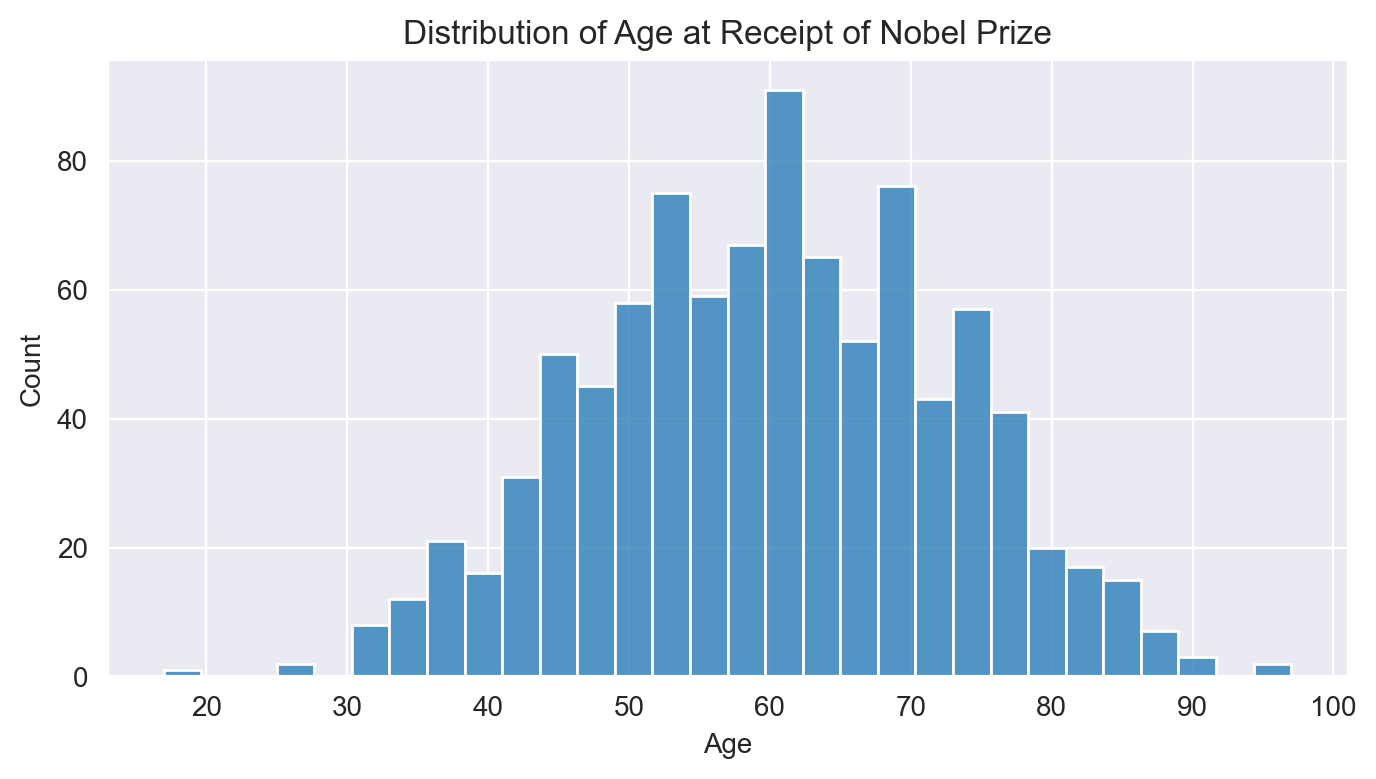

In [210]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(df_data['winning_age'], bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age at Receipt of Nobel Prize')
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.

In [211]:
## 수상자 나이의 기술 통계와 분포
print(df_data['winning_age'].describe())

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64


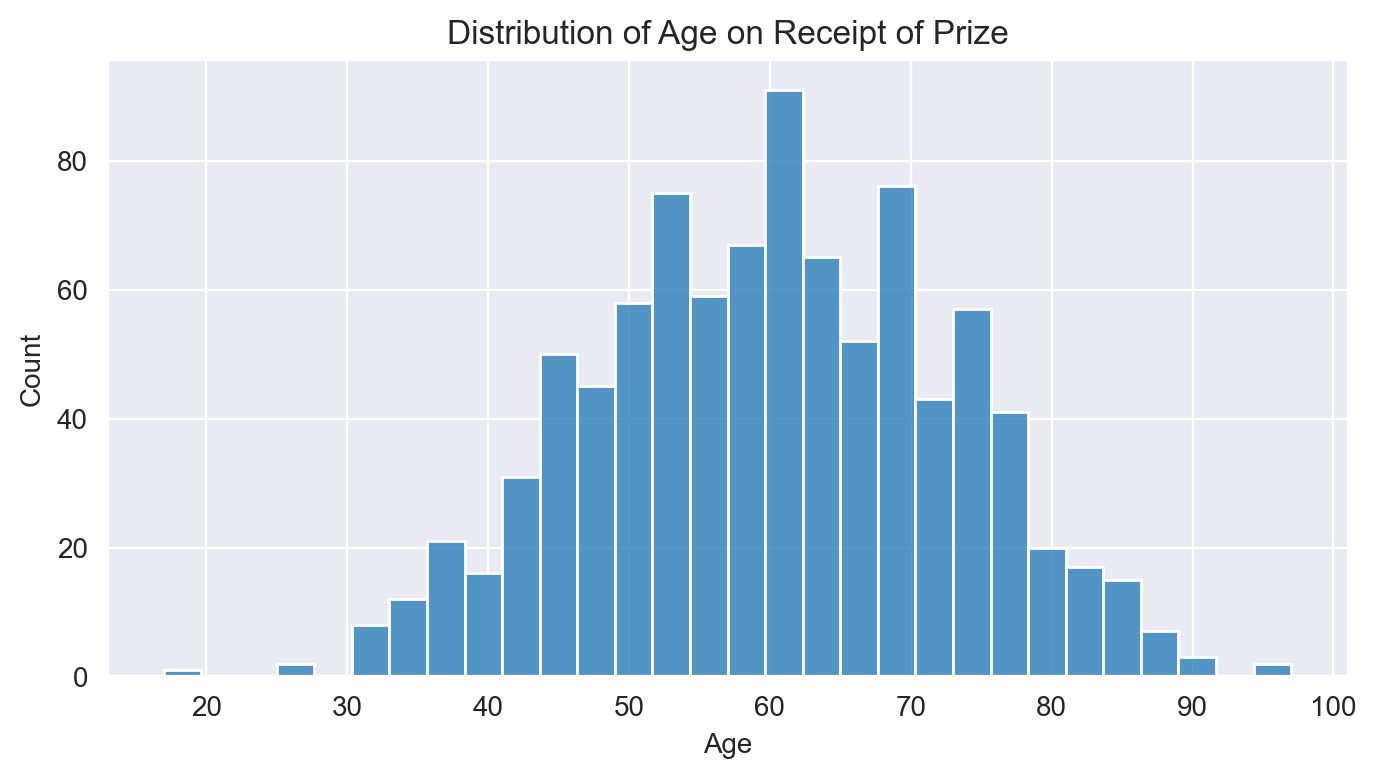

In [212]:
# Binning을 실험하며 히스토그램을 그리는 코드 30 bins 셋팅

plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data,
             x=df_data.winning_age,
             bins=30)
plt.xlabel('Age')
plt.title('Distribution of Age on Receipt of Prize')
plt.show()

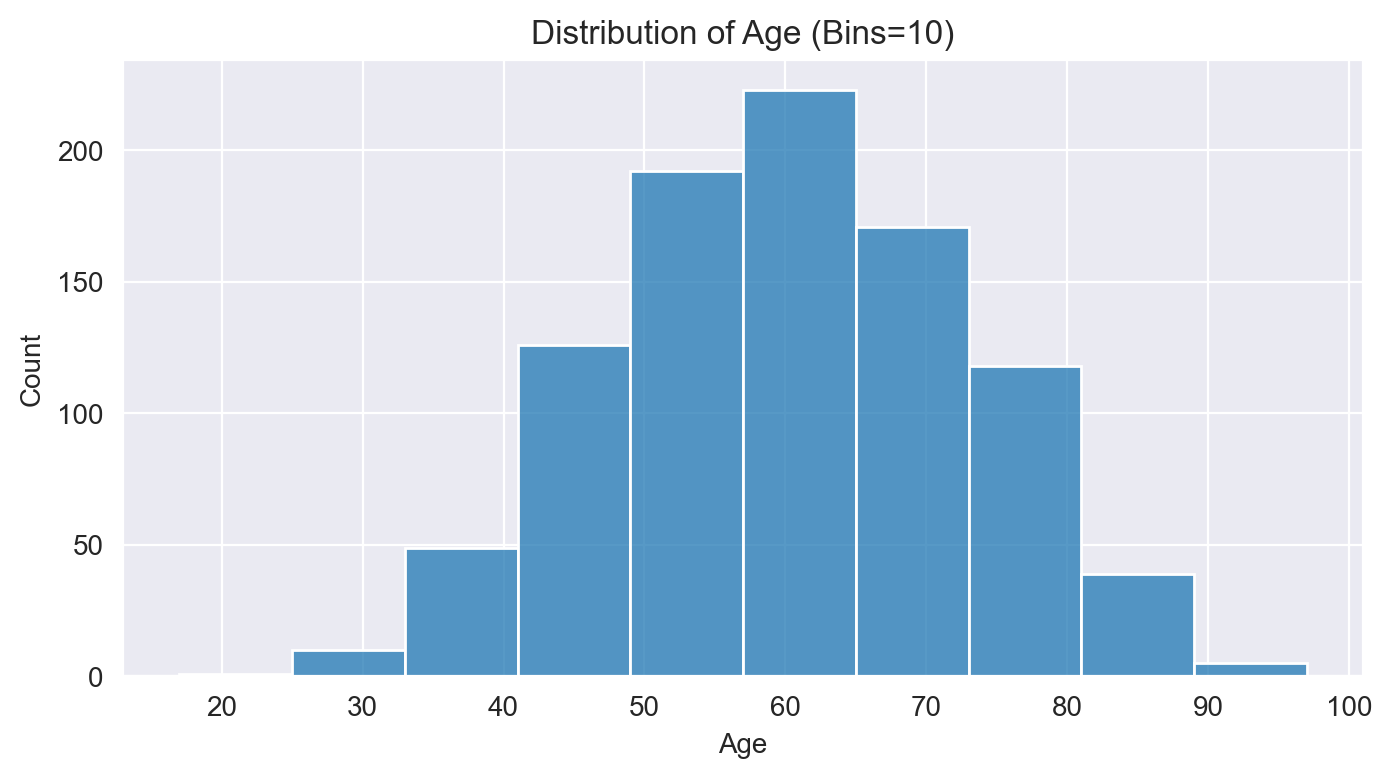

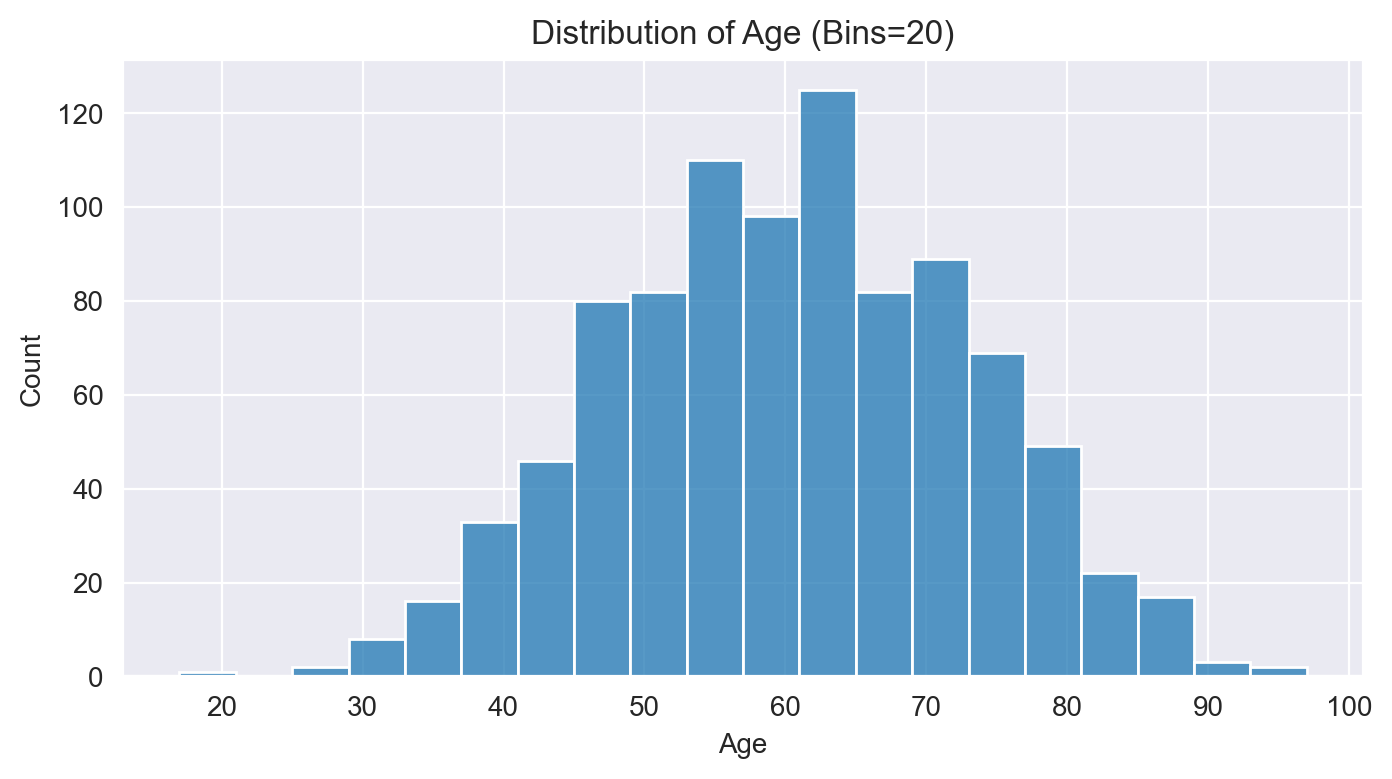

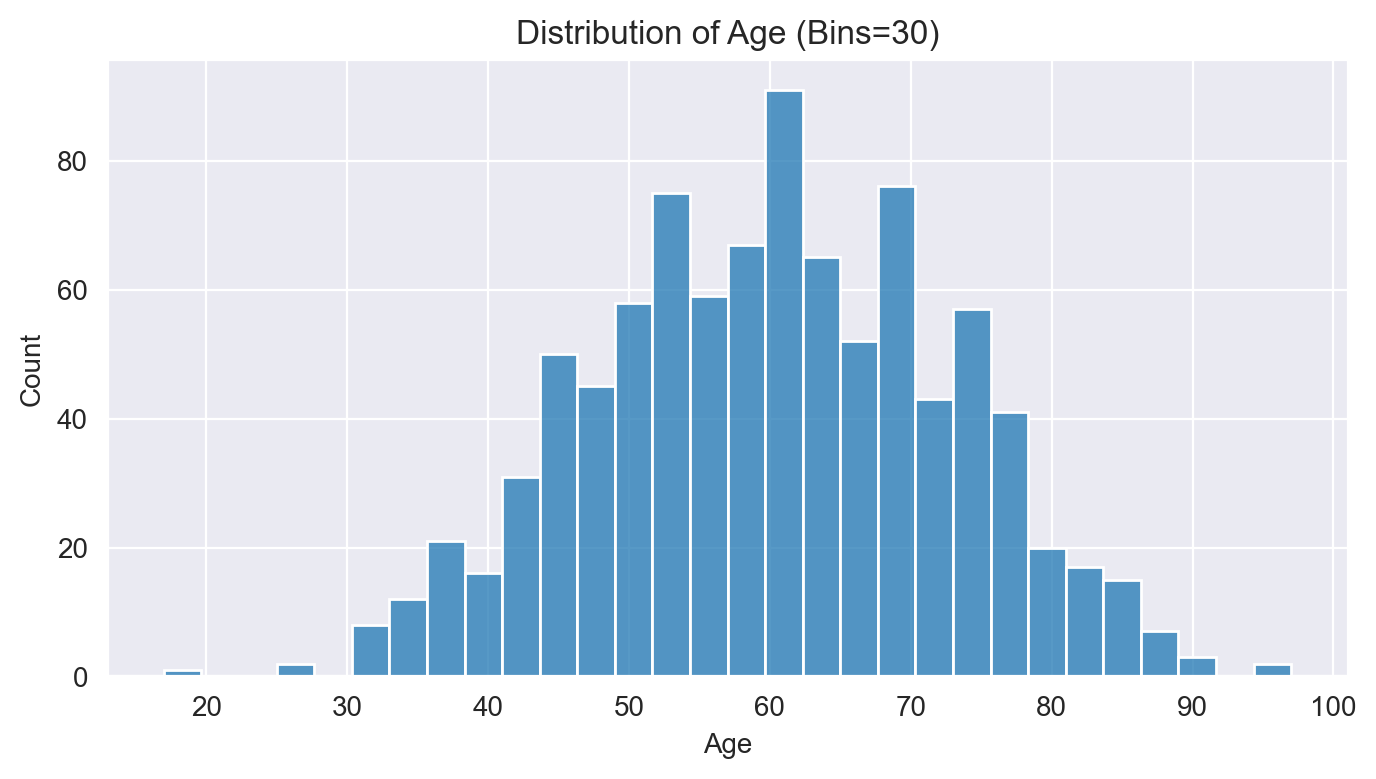

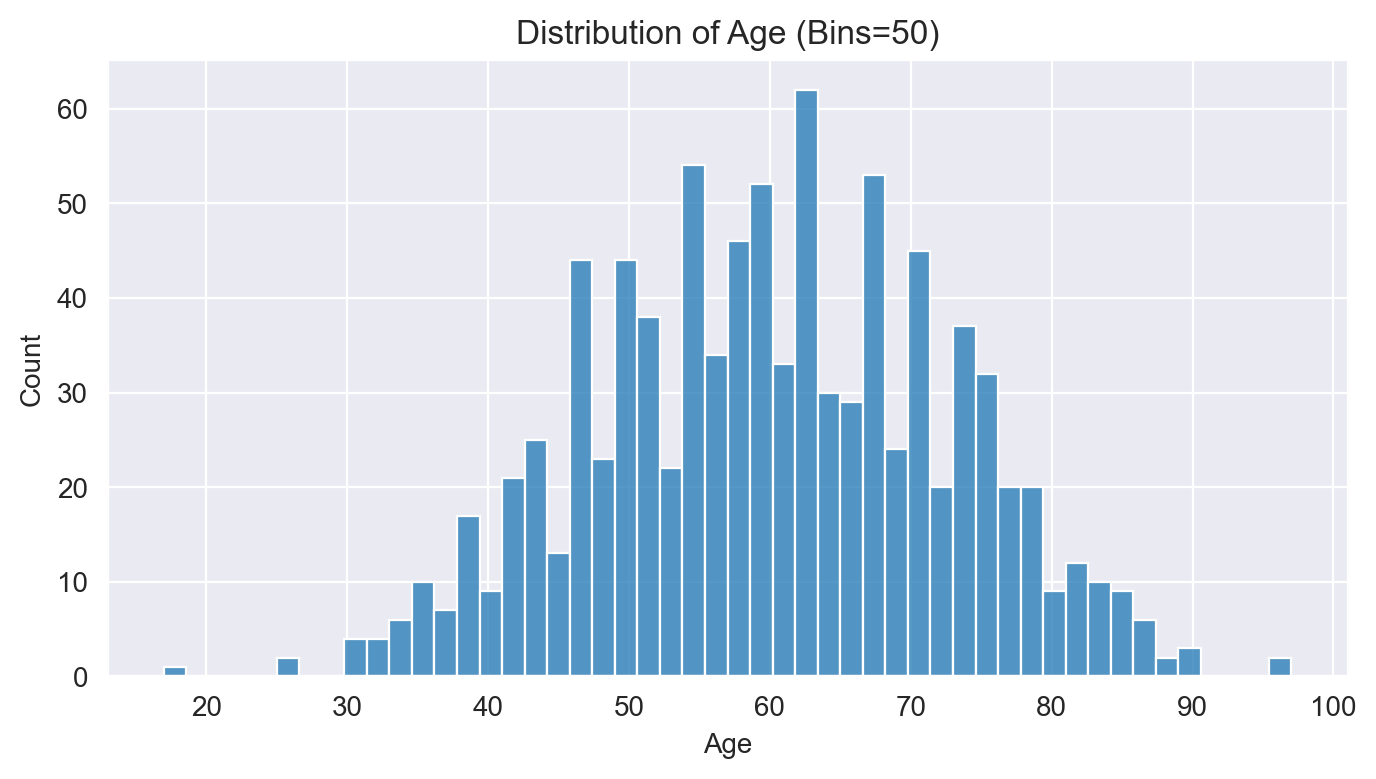

In [213]:
# Binning을 실험하며 히스토그램을 그리는 코드

# 다양한 bin 개수를 시도해 히스토그램을 그리는 반복문
for bins in [10, 20, 30, 50]:  # bin 개수로 10, 20, 30, 50을 시도
    plt.figure(figsize=(8, 4), dpi=200)  # 그래프 크기 설정 (8x4인치)와 해상도(DPI) 설정
    sns.histplot(df_data['winning_age'], bins=bins)  # Seaborn 히스토그램 생성, bins에 따른 분할
    plt.xlabel('Age')  # x축 레이블 설정
    plt.title(f'Distribution of Age (Bins={bins})')  # 그래프 제목: 사용된 bin 개수 표시
    plt.show()  # 생성된 그래프 출력

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


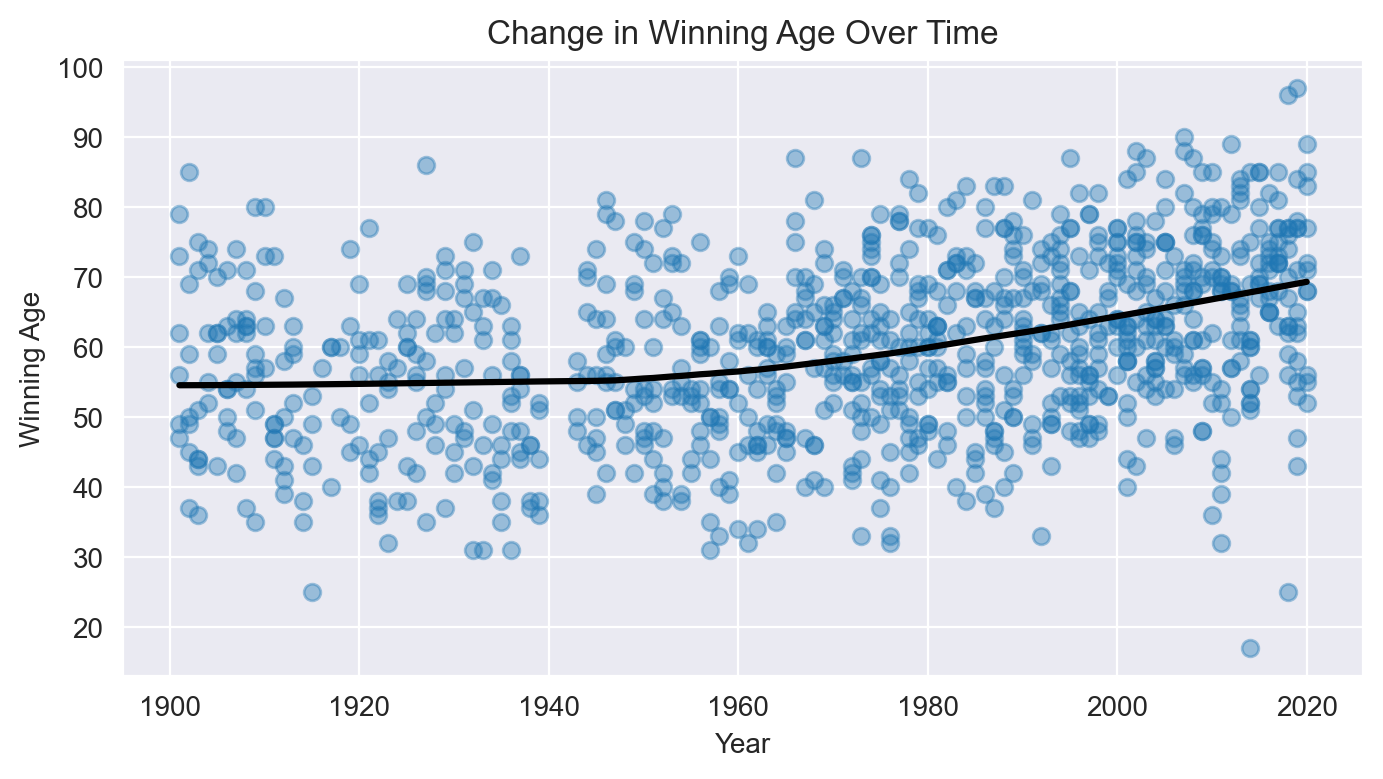

In [214]:
# 회귀선 플롯
plt.figure(figsize=(8, 4), dpi=200)
sns.regplot(
    data=df_data,
    x='year',
    y='winning_age',
    lowess= True,
    scatter_kws={'alpha': 0.4},  # 산점도 투명도 설정
    line_kws={'color': 'black'}  # 회귀선 색상 설정
)
plt.title('Change in Winning Age Over Time')
plt.xlabel('Year')
plt.ylabel('Winning Age')
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

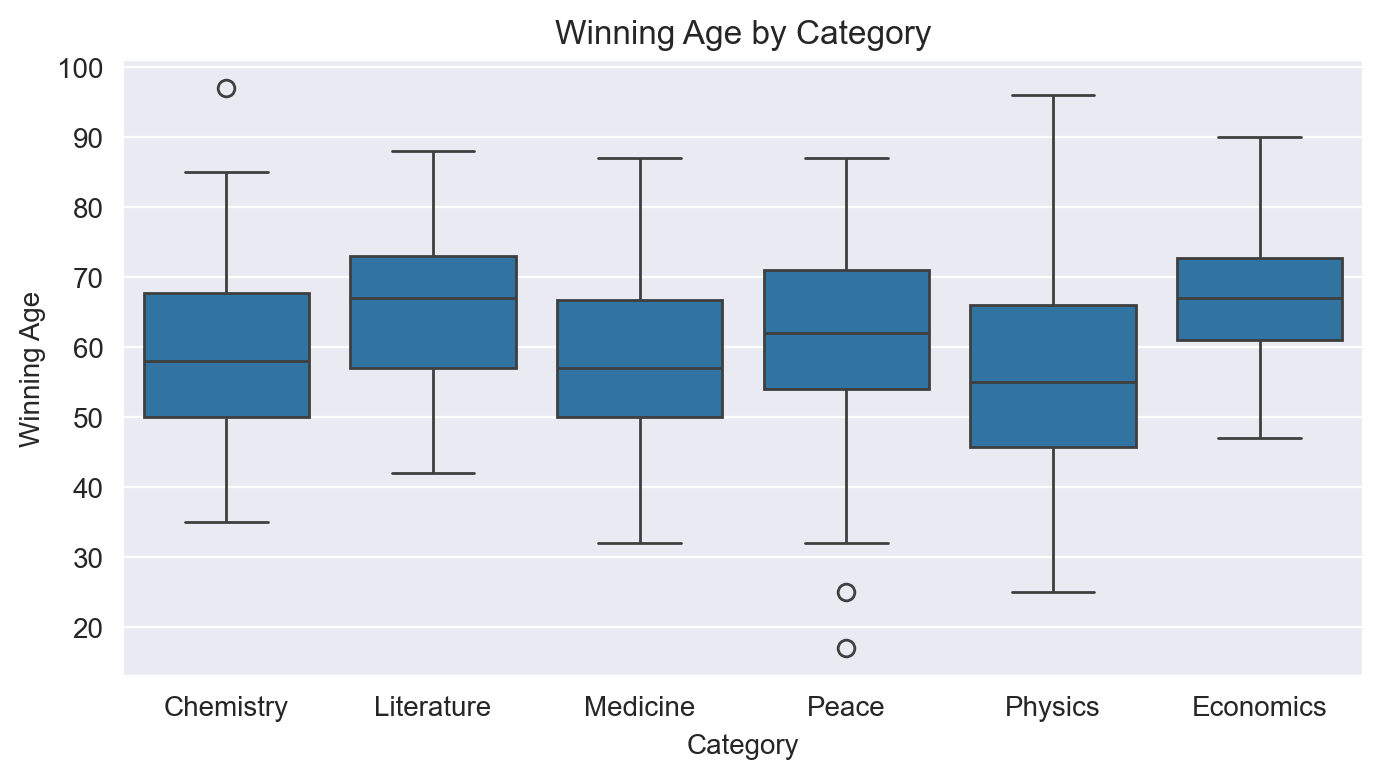

In [215]:
### Winning Age Across the Nobel Prize Categories

# 그래프 크기와 해상도 설정
plt.figure(figsize=(8, 4), dpi=200)

# Seaborn boxplot 생성
sns.boxplot(
    data=df_data,  # 데이터프레임: df_data
    x='category',  # x축: 수상 분야 (category)
    y='winning_age'  # y축: 수상 당시 나이 (winning_age)
)

# 그래프 제목 설정
plt.title('Winning Age by Category')

# x축 레이블 설정
plt.xlabel('Category')

# y축 레이블 설정
plt.ylabel('Winning Age')

# 그래프 출력
plt.show()

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


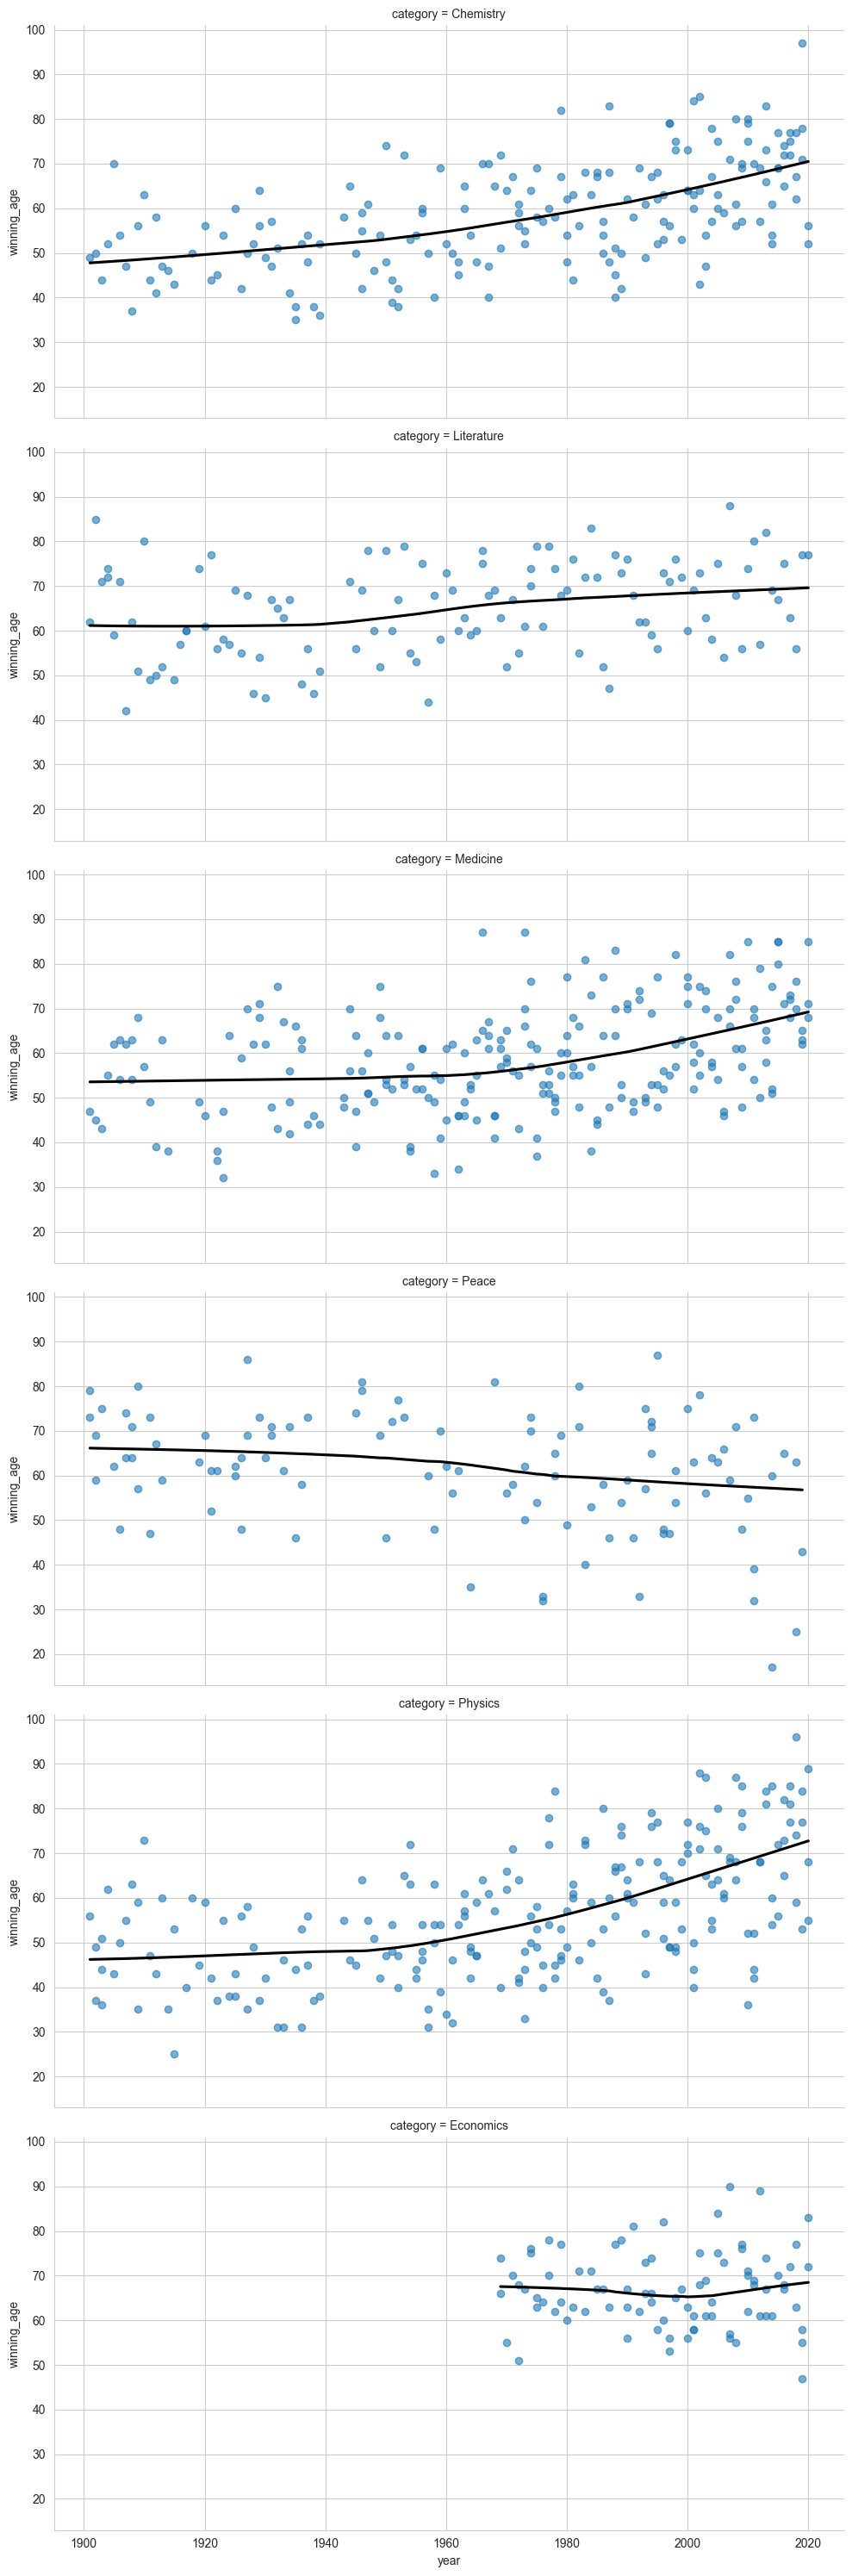

In [216]:
# Seaborn 스타일 설정: 'whitegrid' 스타일을 사용해 배경에 그리드 추가
with sns.axes_style('whitegrid'):
    # lmplot을 사용하여 회귀선 및 산점도 생성
    sns.lmplot(
        data=df_data,              # 데이터프레임: df_data
        x='year',                  # x축: 수상 연도 (year)
        y='winning_age',           # y축: 수상 당시 나이 (winning_age)
        row='category',            # 각 수상 분야(category)별로 행(row)을 나눠서 그래프 생성
        lowess=True,               # Lowess 옵션 활성화: 비선형 추세를 부드러운 선으로 표현
        aspect=2,                  # 각 플롯의 가로/세로 비율 설정 (aspect ratio)
        scatter_kws={'alpha': 0.6},# 산점도 점의 투명도(alpha)를 설정 (0.6)
        line_kws={'color': 'black'}# 회귀선 색상을 검정색(black)으로 설정
    )

# 차트를 화면에 출력
plt.show()


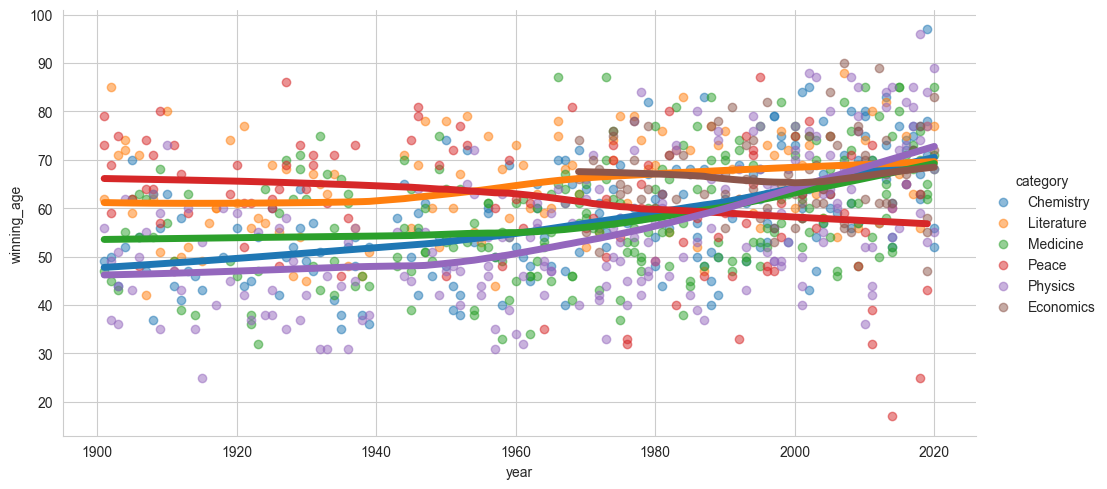

In [217]:
# Seaborn 스타일 설정: 'whitegrid' 스타일을 사용하여 배경에 그리드 추가
with sns.axes_style("whitegrid"):
    # lmplot을 사용하여 카테고리별 회귀선 및 산점도 생성
    sns.lmplot(
        data=df_data,               # 데이터프레임: df_data
        x='year',                   # x축: 수상 연도 (year)
        y='winning_age',            # y축: 수상 당시 나이 (winning_age)
        hue='category',             # 각 수상 분야(category)에 따라 색상 구분
        lowess=True,                # Lowess 옵션 활성화: 비선형 추세를 부드러운 선으로 표현
        aspect=2,                   # 플롯의 가로/세로 비율 설정 (aspect ratio)
        scatter_kws={'alpha': 0.5}, # 산점도 점의 투명도(alpha)를 설정 (0.5)
        line_kws={'linewidth': 5}   # 회귀선의 두께(linewidth)를 설정 (5)
    )

# 차트를 화면에 출력
plt.show()